=== Basic Dataset Analysis ===
Total Records: 10000

Missing Values:
 productId    0
Title        5
userId       0
Time         0
Text         0
Cat1         0
Cat2         0
Cat3         0
dtype: int64

Review Text Length Statistics:
count    10000.000000
mean       313.597500
std        312.867499
min          4.000000
25%        135.000000
50%        206.000000
75%        374.000000
max       7942.000000
Name: text_length, dtype: float64

Unique Products: 6865
Unique Users: 9716

=== Category Analysis ===

Category Level 1 Distribution:
Cat1
health personal care    2992
beauty                  2135
toys games              1759
pet supplies            1576
grocery gourmet food     840
baby products            698
Name: count, dtype: int64

Category Level 2 Distribution:
Cat2
nutrition wellness    904
dogs                  875
health care           648
hair care             542
personal care         528
                     ... 
dairy eggs             10
produce                 7
meat

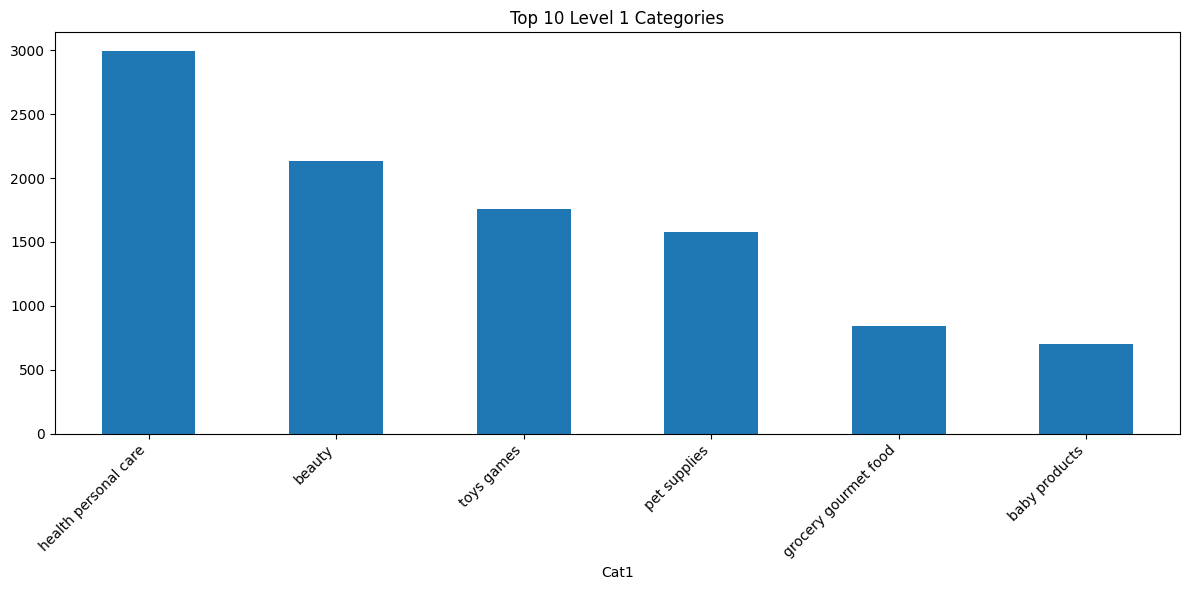


=== Text Analysis ===

Average Review Length by Category:
Cat1
pet supplies            371.048858
baby products           339.538682
grocery gourmet food    310.436905
health personal care    309.767045
beauty                  293.953162
toys games              283.697555
Name: text_length, dtype: float64

Most Common Words:
   Word  Frequency
0   the      24541
1     i      19893
2   and      17610
3    to      14999
4     a      14995
5    it      14675
6  this       9990
7    is       9219
8   for       8734
9    my       8201

=== Time Analysis ===

Time Range:
Start Date: 2012-08-06 00:00:00
End Date: 2013-03-03 00:00:00

Reviews per Day Statistics:
count    210.000000
mean      47.619048
std       28.676343
min        1.000000
25%       25.000000
50%       35.000000
75%       67.750000
max      152.000000
dtype: float64

=== User Analysis ===

User Activity Statistics:
count    9716.00000
mean        1.02923
std         0.23526
min         1.00000
25%         1.00000
50%        

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

# Read the dataset
df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')

# 1. Basic Dataset Overview
def basic_analysis(df):
    print("=== Basic Dataset Analysis ===")
    print(f"Total Records: {len(df)}")
    print("\nMissing Values:\n", df.isnull().sum())
    
    # Text length statistics
    df['text_length'] = df['Text'].str.len()
    print("\nReview Text Length Statistics:")
    print(df['text_length'].describe())
    
    # Unique counts
    print(f"\nUnique Products: {df['productId'].nunique()}")
    print(f"Unique Users: {df['userId'].nunique()}")

# 2. Category Analysis
def category_analysis(df):
    print("\n=== Category Analysis ===")
    print("\nCategory Level 1 Distribution:")
    cat1_dist = df['Cat1'].value_counts()
    print(cat1_dist)
    
    print("\nCategory Level 2 Distribution:")
    cat2_dist = df['Cat2'].value_counts()
    print(cat2_dist)
    
    # Visualize top categories
    plt.figure(figsize=(12,6))
    cat1_dist.head(10).plot(kind='bar')
    plt.title('Top 10 Level 1 Categories')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Text Analysis
def text_analysis(df):
    print("\n=== Text Analysis ===")
    
    # Average review length by category
    avg_length = df.groupby('Cat1')['text_length'].mean().sort_values(ascending=False)
    print("\nAverage Review Length by Category:")
    print(avg_length)
    
    # Common words analysis (simple version)
    all_text = ' '.join(df['Text'].str.lower())
    words = all_text.split()
    word_freq = Counter(words)
    
    print("\nMost Common Words:")
    print(pd.DataFrame(word_freq.most_common(10), columns=['Word', 'Frequency']))

# 4. Time Analysis
def time_analysis(df):
    print("\n=== Time Analysis ===")
    
    # Convert timestamp to datetime
    df['Time'] = pd.to_datetime(df['Time'], unit='s')
    
    print("\nTime Range:")
    print(f"Start Date: {df['Time'].min()}")
    print(f"End Date: {df['Time'].max()}")
    
    # Reviews per day
    reviews_per_day = df.groupby(df['Time'].dt.date).size()
    print("\nReviews per Day Statistics:")
    print(reviews_per_day.describe())

# 5. User Analysis
def user_analysis(df):
    print("\n=== User Analysis ===")
    
    user_activity = df['userId'].value_counts()
    print("\nUser Activity Statistics:")
    print(user_activity.describe())
    
    # Users with most reviews
    print("\nTop 5 Most Active Users:")
    print(user_activity.head())

# Execute all analyses
basic_analysis(df)
category_analysis(df)
text_analysis(df)
time_analysis(df)
user_analysis(df)

# Additional insights
print("\n=== Category Hierarchy Analysis ===")
category_paths = df.groupby(['Cat1', 'Cat2', 'Cat3']).size().reset_index(name='count')
print("\nTop 5 Complete Category Paths:")
print(category_paths.sort_values('count', ascending=False).head())


In [10]:
import pandas as pd
# Read the dataset
df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')

In [15]:
len(df['Cat1'].unique())

6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

class CategoryRelationshipAnalyzer:
    def __init__(self, df):
        self.df = df
        plt.style.use('seaborn')
        
    def analyze_relationships(self):
        """Main function to analyze category relationships"""
        self.contingency_analysis()
        self.transition_analysis()
        self.correlation_analysis()
        self.hierarchical_flow_analysis()
        self.category_co_occurrence()
        
    def contingency_analysis(self):
        """Analyze contingency tables between category levels"""
        print("=== Category Contingency Analysis ===")
        
        # Cat1 to Cat2 contingency
        cont_table_12 = pd.crosstab(self.df['Cat1'], self.df['Cat2'])
        chi2_12, p_12, _, _ = chi2_contingency(cont_table_12)
        
        # Cat2 to Cat3 contingency
        cont_table_23 = pd.crosstab(self.df['Cat2'], self.df['Cat3'])
        chi2_23, p_23, _, _ = chi2_contingency(cont_table_23)
        
        print("\nChi-square test results:")
        print(f"Cat1-Cat2: chi2={chi2_12:.2f}, p={p_12:.4f}")
        print(f"Cat2-Cat3: chi2={chi2_23:.2f}, p={p_23:.4f}")
        
        # Visualize contingency tables
        plt.figure(figsize=(15, 10))
        sns.heatmap(cont_table_12, cmap='YlOrRd', 
                   cbar_kws={'label': 'Count'})
        plt.title('Category Level 1 to Level 2 Relationship Heatmap')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def transition_analysis(self):
        """Analyze transition probabilities between categories"""
        print("\n=== Category Transition Analysis ===")
        
        # Calculate transition probabilities
        trans_prob_12 = pd.crosstab(self.df['Cat1'], self.df['Cat2'], 
                                   normalize='index')
        trans_prob_23 = pd.crosstab(self.df['Cat2'], self.df['Cat3'], 
                                   normalize='index')
        
        # Display top transitions
        print("\nTop Cat1 to Cat2 transitions:")
        for cat1 in trans_prob_12.index:
            top_trans = trans_prob_12.loc[cat1].nlargest(3)
            print(f"\n{cat1}:")
            for cat2, prob in top_trans.items():
                print(f"  → {cat2}: {prob:.2%}")
                
        # Visualize transitions
        self.plot_transition_sankey()

    def plot_transition_sankey(self):
        """Create Sankey diagram for category transitions"""
        # Prepare data for Sankey diagram
        cat_flows = self.df.groupby(['Cat1', 'Cat2', 'Cat3']).size().reset_index(name='value')
        
        # Create node lists
        all_cats = (list(cat_flows['Cat1'].unique()) + 
                   list(cat_flows['Cat2'].unique()) + 
                   list(cat_flows['Cat3'].unique()))
        node_indices = {cat: idx for idx, cat in enumerate(all_cats)}
        
        # Create links
        source = []
        target = []
        value = []
        
        for _, row in cat_flows.iterrows():
            # Cat1 to Cat2
            source.append(node_indices[row['Cat1']])
            target.append(node_indices[row['Cat2']])
            value.append(row['value'])
            
            # Cat2 to Cat3
            source.append(node_indices[row['Cat2']])
            target.append(node_indices[row['Cat3']])
            value.append(row['value'])
        
        # Create and show Sankey diagram
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=all_cats,
                color="blue"
            ),
            link=dict(
                source=source,
                target=target,
                value=value
            )
        )])
        
        fig.update_layout(title_text="Category Hierarchy Flow",
                         font_size=10)
        fig.show()

    def correlation_analysis(self):
        """Analyze correlations between category levels"""
        print("\n=== Category Correlation Analysis ===")
        
        # Convert categories to numeric
        cat_encoded = pd.get_dummies(self.df[['Cat1', 'Cat2', 'Cat3']])
        
        # Calculate correlations
        corr_matrix = cat_encoded.corr()
        
        # Visualize correlations
        plt.figure(figsize=(15, 15))
        sns.heatmap(corr_matrix, cmap='RdBu', center=0,
                   cbar_kws={'label': 'Correlation'})
        plt.title('Category Correlation Heatmap')
        plt.tight_layout()
        plt.show()

    def hierarchical_flow_analysis(self):
        """Analyze hierarchical flows between categories"""
        print("\n=== Hierarchical Flow Analysis ===")
        
        # Create complete paths
        self.df['category_path'] = (self.df['Cat1'] + ' → ' + 
                                  self.df['Cat2'] + ' → ' + 
                                  self.df['Cat3'])
        
        # Analyze top paths
        path_counts = self.df['category_path'].value_counts()
        
        print("\nTop 10 Category Paths:")
        for path, count in path_counts.head(10).items():
            print(f"{path}: {count}")
            
        # Visualize paths
        plt.figure(figsize=(15, 8))
        path_counts.head(15).plot(kind='bar')
        plt.title('Top 15 Category Paths')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def category_co_occurrence(self):
        """Analyze category co-occurrence patterns"""
        print("\n=== Category Co-occurrence Analysis ===")
        
        # Create co-occurrence matrices
        co_occ_12 = pd.crosstab(self.df['Cat1'], self.df['Cat2'])
        co_occ_23 = pd.crosstab(self.df['Cat2'], self.df['Cat3'])
        
        # Calculate conditional probabilities
        cond_prob_12 = co_occ_12.div(co_occ_12.sum(axis=1), axis=0)
        cond_prob_23 = co_occ_23.div(co_occ_23.sum(axis=1), axis=0)
        
        # Display strong relationships
        print("\nStrong Cat1-Cat2 Relationships:")
        for cat1 in cond_prob_12.index:
            strong_rel = cond_prob_12.loc[cat1][cond_prob_12.loc[cat1] > 0.5]
            if not strong_rel.empty:
                print(f"\n{cat1}:")
                for cat2, prob in strong_rel.items():
                    print(f"  → {cat2}: {prob:.2%}")

    def generate_summary_report(self):
        """Generate a summary report of category relationships"""
        print("\n=== Category Relationship Summary Report ===")
        
        # Category distribution
        cat_dist = {
            'Cat1': self.df['Cat1'].value_counts(),
            'Cat2': self.df['Cat2'].value_counts(),
            'Cat3': self.df['Cat3'].value_counts()
        }
        
        # Category relationships
        relationships = {
            'unique_combinations': len(self.df.groupby(['Cat1', 'Cat2', 'Cat3'])),
            'avg_cat2_per_cat1': self.df.groupby('Cat1')['Cat2'].nunique().mean(),
            'avg_cat3_per_cat2': self.df.groupby('Cat2')['Cat3'].nunique().mean()
        }
        
        print("\nCategory Distribution:")
        for level, dist in cat_dist.items():
            print(f"\n{level} top categories:")
            print(dist.head())
            
        print("\nRelationship Statistics:")
        print(f"Unique category combinations: {relationships['unique_combinations']}")
        print(f"Average Cat2 categories per Cat1: {relationships['avg_cat2_per_cat1']:.2f}")
        print(f"Average Cat3 categories per Cat2: {relationships['avg_cat3_per_cat2']:.2f}")

# Usage example
def main():
    # Read the dataset
    df = pd.read_csv('sample.csv')
    
    # Initialize analyzer
    analyzer = CategoryRelationshipAnalyzer(df)
    
    # Run analyses
    analyzer.analyze_relationships()
    analyzer.generate_summary_report()

if __name__ == "__main__":
    main()


productId  \
Cat1          Cat2                    Cat3                                   
baby products bathing skin care       bathing tubs seats        B00005JIVI   
                                      grooming healthcare kits  B000MEB3GE   
                                      shampoo                   B00021D2TI   
                                      skin care                 B000CSCFOO   
                                      soaps cleansers           B00021AYF8   
...                                                                    ...   
toys games    tricycles               scooters wagons           B00000IZEM   
              vehicles remote control die cast vehicles         B0006N8XQ4   
                                      play trains railway sets  B00006DY2I   
                                      play vehicles             B0002HZHUY   
                                      vehicle playsets          B00000JS5S   

                                                                                                            Title  \
Cat1          Cat2                    Cat3                                                                          
baby products bathing skin care       bathing tubs seats          Leachco Safer Bather Infant Bath Pad, Blue Fish   
                                      grooming healthcare kits               Itzbeen Pocket Nanny Baby Care Timer   
                                      shampoo                                  Mustela 2 in 1 Hair & Body Shampoo   
                                      skin care                               Burt's Bees Baby Bee Dusting Powder   
                                      soaps cleansers                Mustela Foam Shampoo for Newborns - 5.07 oz.   
...                                                                                                           ...   
toys games    tricycles               scooters wagons                               Step2 Push Around Buggy (Red)   
              vehicles remote control die cast vehicles                 United Airlines Die-Cast Airport Play Set   
                                      play trains railway sets          Thomas And Friends Wooden Railway - Salty   
                                      play vehicles                         Bruder Trash Bin Set (3 Small, 1 Big)   
                                      vehicle playsets          Hot Wheels Molded 48 Car Case - Colors and Sty...   

                                                                        userId  \
Cat1          Cat2                    Cat3                                       
baby products bathing skin care       bathing tubs seats        A1L4B9ZGFKHTEE   
                                      grooming healthcare kits   AW0EVQUO48808   
                                      shampoo                   A1DK2MBA8M3V53   
                                      skin care                 A3BEFDB48Y70F5   
                                      soaps cleansers           A2JJS7SBW71W5G   
...                                                                        ...   
toys games    tricycles               scooters wagons           A3J5QB0SLKGOBI   
              vehicles remote control die cast vehicles         A13G6NCK4GZIYM   
                                      play trains railway sets  A3PEMZF5IKKZDE   
                                      play vehicles             A3RZ6NXFFE3DEL   
                                      vehicle playsets          A2SAZI6BFO71TC   

                                                                      Time  \
Cat1          Cat2                    Cat3                                   
baby products bathing skin care       bathing tubs seats        1350950400   
                                      grooming healthcare kits  1348444800   
                                      shampoo                   1348617600   
                                      skin care                 1349913

In [24]:
df.groupby(['Cat1','Cat2']).count().sort_values('productId', ascending=False)

productId  Title  userId  Time  Text  \
Cat1                 Cat2                                                       
health personal care nutrition wellness        904    904     904   904   904   
pet supplies         dogs                      875    875     875   875   875   
health personal care health care               648    647     648   648   648   
beauty               hair care                 542    542     542   542   542   
health personal care personal care             528    528     528   528   528   
...                                            ...    ...     ...   ...   ...   
grocery gourmet food dairy eggs                 10     10      10    10    10   
                     produce                     7      7       7     7     7   
                     meat seafood                5      5       5     5     5   
                     meat poultry                3      3       3     3     3   
                     baby food                   2      2       2     2     2   

                                         Cat3  
Cat1                 Cat2                      
health personal care nutrition wellness   904  
pet supplies         dogs                 875  
health personal care health care          648  
beauty               hair care            542  
health personal care personal care        528  
...                                       ...  
grocery gourmet food dairy eggs            10  
                     produce                7  
                     meat seafood           5  
                     meat poultry           3  
                     baby food              2  

[64 rows x 6 columns]

=== Category Contingency Analysis ===

Chi-square test results:
Cat1-Cat2: chi2=50000.00, p=0.0000
Cat2-Cat3: chi2=537395.65, p=0.0000


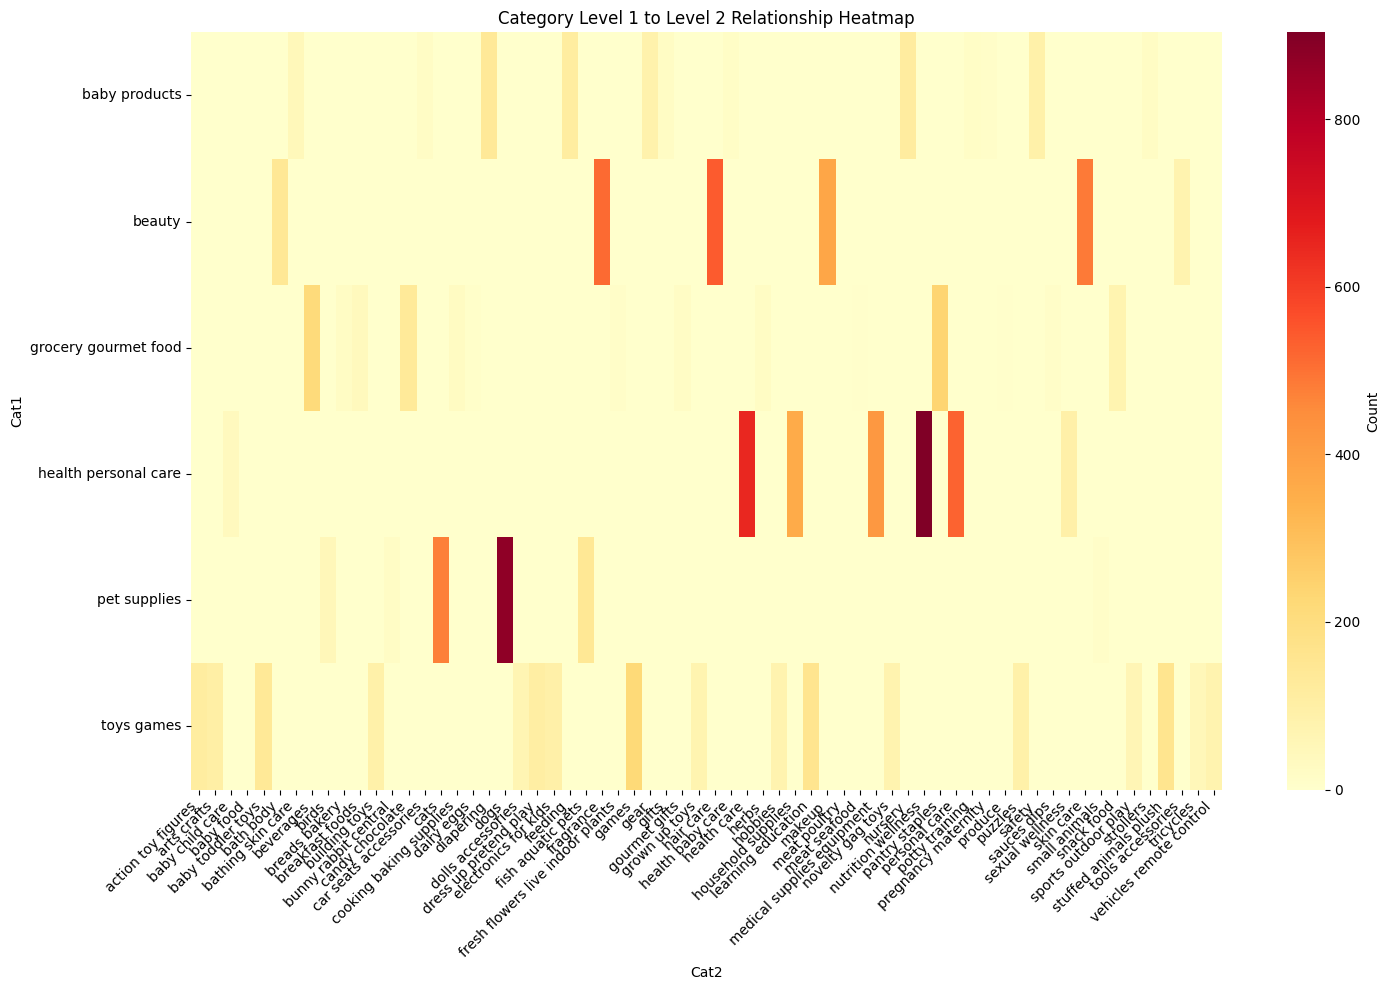


=== Category Transition Analysis ===

Top Cat1 to Cat2 transitions:

baby products:
  → diapering: 19.48%
  → nursery: 16.76%
  → feeding: 16.33%

beauty:
  → hair care: 25.39%
  → fragrance: 24.07%
  → skin care: 22.67%

grocery gourmet food:
  → pantry staples: 28.57%
  → beverages: 25.60%
  → candy chocolate: 15.71%

health personal care:
  → nutrition wellness: 30.21%
  → health care: 21.66%
  → personal care: 17.65%

pet supplies:
  → dogs: 55.52%
  → cats: 30.20%
  → fish aquatic pets: 9.01%

toys games:
  → games: 12.62%
  → learning education: 9.15%
  → stuffed animals plush: 9.15%



=== Category Correlation Analysis ===


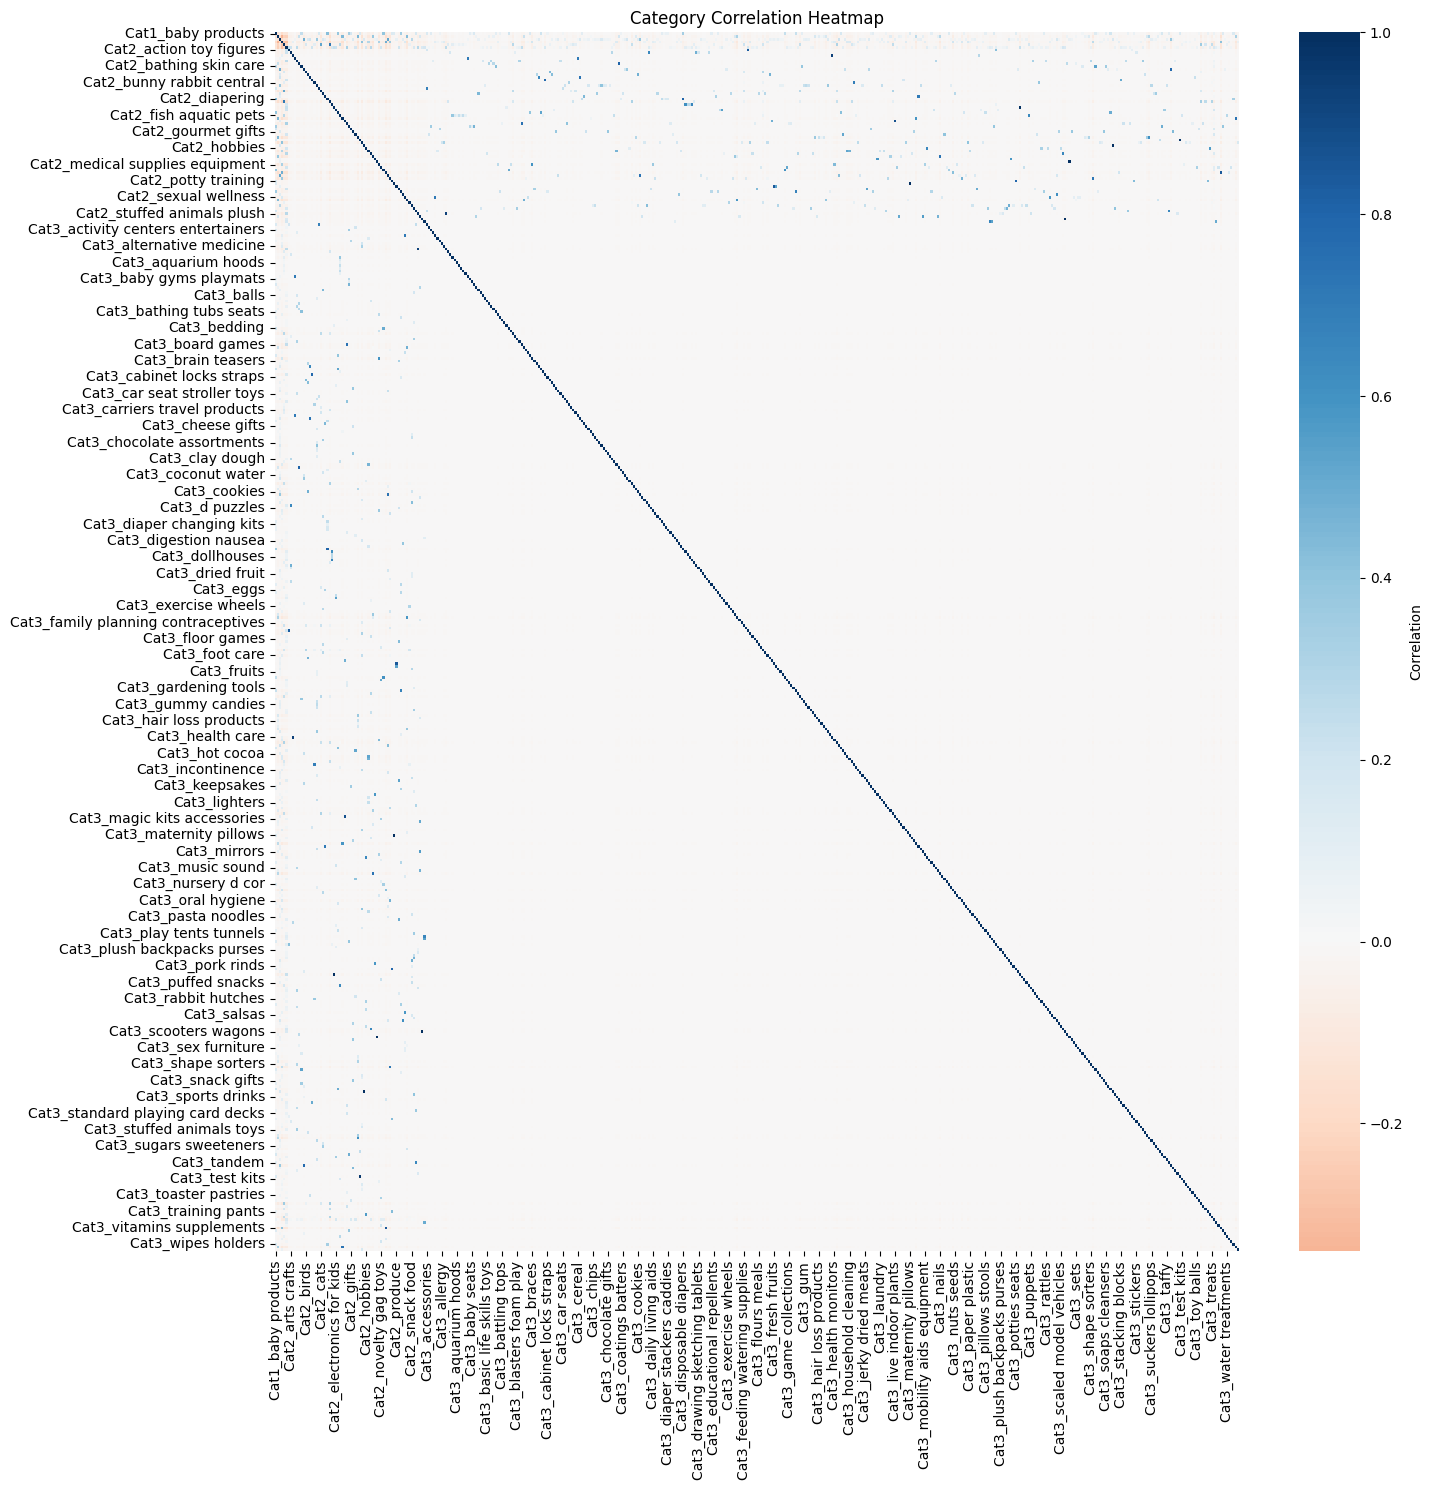


=== Hierarchical Flow Analysis ===

Top 10 Category Paths:
health personal care → nutrition wellness → vitamins supplements: 665
beauty → fragrance → women s: 286
health personal care → personal care → shaving hair removal: 280
beauty → hair care → styling tools: 213
beauty → skin care → face: 212
beauty → makeup → nails: 207
beauty → fragrance → men s: 183
pet supplies → dogs → toys: 169
health personal care → nutrition wellness → nutrition bars drinks: 169
health personal care → medical supplies equipment → braces: 151


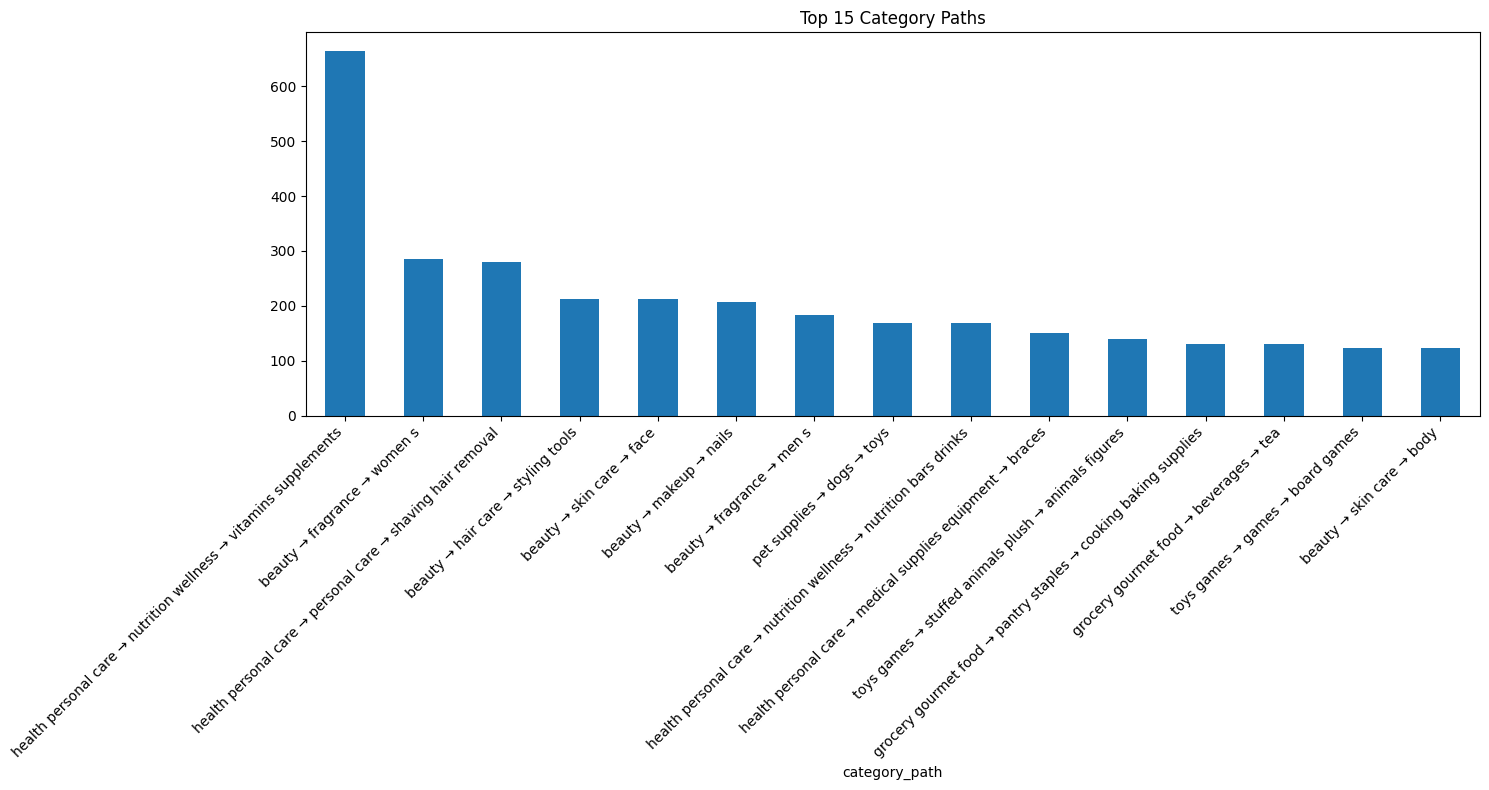


=== Category Co-occurrence Analysis ===

Strong Cat1-Cat2 Relationships:

pet supplies:
  → dogs: 55.52%

=== Category Relationship Summary Report ===

Category Distribution:

Cat1 top categories:
Cat1
health personal care    2992
beauty                  2135
toys games              1759
pet supplies            1576
grocery gourmet food     840
Name: count, dtype: int64

Cat2 top categories:
Cat2
nutrition wellness    904
dogs                  875
health care           648
hair care             542
personal care         528
Name: count, dtype: int64

Cat3 top categories:
Cat3
vitamins supplements    665
unknown                 487
women s                 286
shaving hair removal    280
face                    262
Name: count, dtype: int64

Relationship Statistics:
Unique category combinations: 452
Average Cat2 categories per Cat1: 10.67
Average Cat3 categories per Cat2: 7.06


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

class CategoryRelationshipAnalyzer:
    def __init__(self, df):
        self.df = df
        
    def analyze_relationships(self):
        """Main function to analyze category relationships"""
        self.contingency_analysis()
        self.transition_analysis()
        self.correlation_analysis()
        self.hierarchical_flow_analysis()
        self.category_co_occurrence()
        
    def contingency_analysis(self):
        """Analyze contingency tables between category levels"""
        print("=== Category Contingency Analysis ===")
        
        # Cat1 to Cat2 contingency
        cont_table_12 = pd.crosstab(self.df['Cat1'], self.df['Cat2'])
        chi2_12, p_12, _, _ = chi2_contingency(cont_table_12)
        
        # Cat2 to Cat3 contingency
        cont_table_23 = pd.crosstab(self.df['Cat2'], self.df['Cat3'])
        chi2_23, p_23, _, _ = chi2_contingency(cont_table_23)
        
        print("\nChi-square test results:")
        print(f"Cat1-Cat2: chi2={chi2_12:.2f}, p={p_12:.4f}")
        print(f"Cat2-Cat3: chi2={chi2_23:.2f}, p={p_23:.4f}")
        
        # Visualize contingency tables
        plt.figure(figsize=(15, 10))
        sns.heatmap(cont_table_12, cmap='YlOrRd', 
                   cbar_kws={'label': 'Count'})
        plt.title('Category Level 1 to Level 2 Relationship Heatmap')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def transition_analysis(self):
        """Analyze transition probabilities between categories"""
        print("\n=== Category Transition Analysis ===")
        
        # Calculate transition probabilities
        trans_prob_12 = pd.crosstab(self.df['Cat1'], self.df['Cat2'], 
                                   normalize='index')
        trans_prob_23 = pd.crosstab(self.df['Cat2'], self.df['Cat3'], 
                                   normalize='index')
        
        # Display top transitions
        print("\nTop Cat1 to Cat2 transitions:")
        for cat1 in trans_prob_12.index:
            top_trans = trans_prob_12.loc[cat1].nlargest(3)
            print(f"\n{cat1}:")
            for cat2, prob in top_trans.items():
                print(f"  → {cat2}: {prob:.2%}")
                
        # Visualize transitions
        self.plot_transition_sankey()

    def plot_transition_sankey(self):
        """Create Sankey diagram for category transitions"""
        # Prepare data for Sankey diagram
        cat_flows = self.df.groupby(['Cat1', 'Cat2', 'Cat3']).size().reset_index(name='value')
        
        # Create node lists
        all_cats = (list(cat_flows['Cat1'].unique()) + 
                   list(cat_flows['Cat2'].unique()) + 
                   list(cat_flows['Cat3'].unique()))
        node_indices = {cat: idx for idx, cat in enumerate(all_cats)}
        
        # Create links
        source = []
        target = []
        value = []
        
        for _, row in cat_flows.iterrows():
            # Cat1 to Cat2
            source.append(node_indices[row['Cat1']])
            target.append(node_indices[row['Cat2']])
            value.append(row['value'])
            
            # Cat2 to Cat3
            source.append(node_indices[row['Cat2']])
            target.append(node_indices[row['Cat3']])
            value.append(row['value'])
        
        # Create and show Sankey diagram
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=all_cats,
                color="blue"
            ),
            link=dict(
                source=source,
                target=target,
                value=value
            )
        )])
        
        fig.update_layout(title_text="Category Hierarchy Flow",
                         font_size=10)
        fig.show()

    def correlation_analysis(self):
        """Analyze correlations between category levels"""
        print("\n=== Category Correlation Analysis ===")
        
        # Convert categories to numeric
        cat_encoded = pd.get_dummies(self.df[['Cat1', 'Cat2', 'Cat3']])
        
        # Calculate correlations
        corr_matrix = cat_encoded.corr()
        
        # Visualize correlations
        plt.figure(figsize=(15, 15))
        sns.heatmap(corr_matrix, cmap='RdBu', center=0,
                   cbar_kws={'label': 'Correlation'})
        plt.title('Category Correlation Heatmap')
        plt.tight_layout()
        plt.show()

    def hierarchical_flow_analysis(self):
        """Analyze hierarchical flows between categories"""
        print("\n=== Hierarchical Flow Analysis ===")
        
        # Create complete paths
        self.df['category_path'] = (self.df['Cat1'] + ' → ' + 
                                  self.df['Cat2'] + ' → ' + 
                                  self.df['Cat3'])
        
        # Analyze top paths
        path_counts = self.df['category_path'].value_counts()
        
        print("\nTop 10 Category Paths:")
        for path, count in path_counts.head(10).items():
            print(f"{path}: {count}")
            
        # Visualize paths
        plt.figure(figsize=(15, 8))
        path_counts.head(15).plot(kind='bar')
        plt.title('Top 15 Category Paths')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def category_co_occurrence(self):
        """Analyze category co-occurrence patterns"""
        print("\n=== Category Co-occurrence Analysis ===")
        
        # Create co-occurrence matrices
        co_occ_12 = pd.crosstab(self.df['Cat1'], self.df['Cat2'])
        co_occ_23 = pd.crosstab(self.df['Cat2'], self.df['Cat3'])
        
        # Calculate conditional probabilities
        cond_prob_12 = co_occ_12.div(co_occ_12.sum(axis=1), axis=0)
        cond_prob_23 = co_occ_23.div(co_occ_23.sum(axis=1), axis=0)
        
        # Display strong relationships
        print("\nStrong Cat1-Cat2 Relationships:")
        for cat1 in cond_prob_12.index:
            strong_rel = cond_prob_12.loc[cat1][cond_prob_12.loc[cat1] > 0.5]
            if not strong_rel.empty:
                print(f"\n{cat1}:")
                for cat2, prob in strong_rel.items():
                    print(f"  → {cat2}: {prob:.2%}")

    def generate_summary_report(self):
        """Generate a summary report of category relationships"""
        print("\n=== Category Relationship Summary Report ===")
        
        # Category distribution
        cat_dist = {
            'Cat1': self.df['Cat1'].value_counts(),
            'Cat2': self.df['Cat2'].value_counts(),
            'Cat3': self.df['Cat3'].value_counts()
        }
        
        # Category relationships
        relationships = {
            'unique_combinations': len(self.df.groupby(['Cat1', 'Cat2', 'Cat3'])),
            'avg_cat2_per_cat1': self.df.groupby('Cat1')['Cat2'].nunique().mean(),
            'avg_cat3_per_cat2': self.df.groupby('Cat2')['Cat3'].nunique().mean()
        }
        
        print("\nCategory Distribution:")
        for level, dist in cat_dist.items():
            print(f"\n{level} top categories:")
            print(dist.head())
            
        print("\nRelationship Statistics:")
        print(f"Unique category combinations: {relationships['unique_combinations']}")
        print(f"Average Cat2 categories per Cat1: {relationships['avg_cat2_per_cat1']:.2f}")
        print(f"Average Cat3 categories per Cat2: {relationships['avg_cat3_per_cat2']:.2f}")

# Usage example
def main():
    # Read the dataset
    df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')
    # Initialize analyzer
    analyzer = CategoryRelationshipAnalyzer(df)
    
    # Run analyses
    analyzer.analyze_relationships()
    analyzer.generate_summary_report()

if __name__ == "__main__":
    main()



=== Hierarchy Classification Approach Recommendations ===

1. Dataset Characteristics:
Total samples: 10000
Number of classes: L1=6, L2=64, L3=377
Imbalance ratio: 4.29

Average children per node: 10.67

2. Recommended Approaches:

A. Local Approach (Level-by-Level):
   Recommended because:
   - Manageable class imbalance
   - Clear level separation possible

   Implementation example:

            class LocalClassifier:
                def __init__(self):
                    self.level1_clf = RandomForestClassifier()
                    self.level2_clfs = {}
                    self.level3_clfs = {}
                
                def fit(self, X, y1, y2, y3):
                    # Train level 1
                    self.level1_clf.fit(X, y1)
                    
                    # Train level 2 classifiers
                    for cat1 in np.unique(y1):
                        mask = y1 == cat1
                        self.level2_clfs[cat1] = RandomForestClassifier()
             

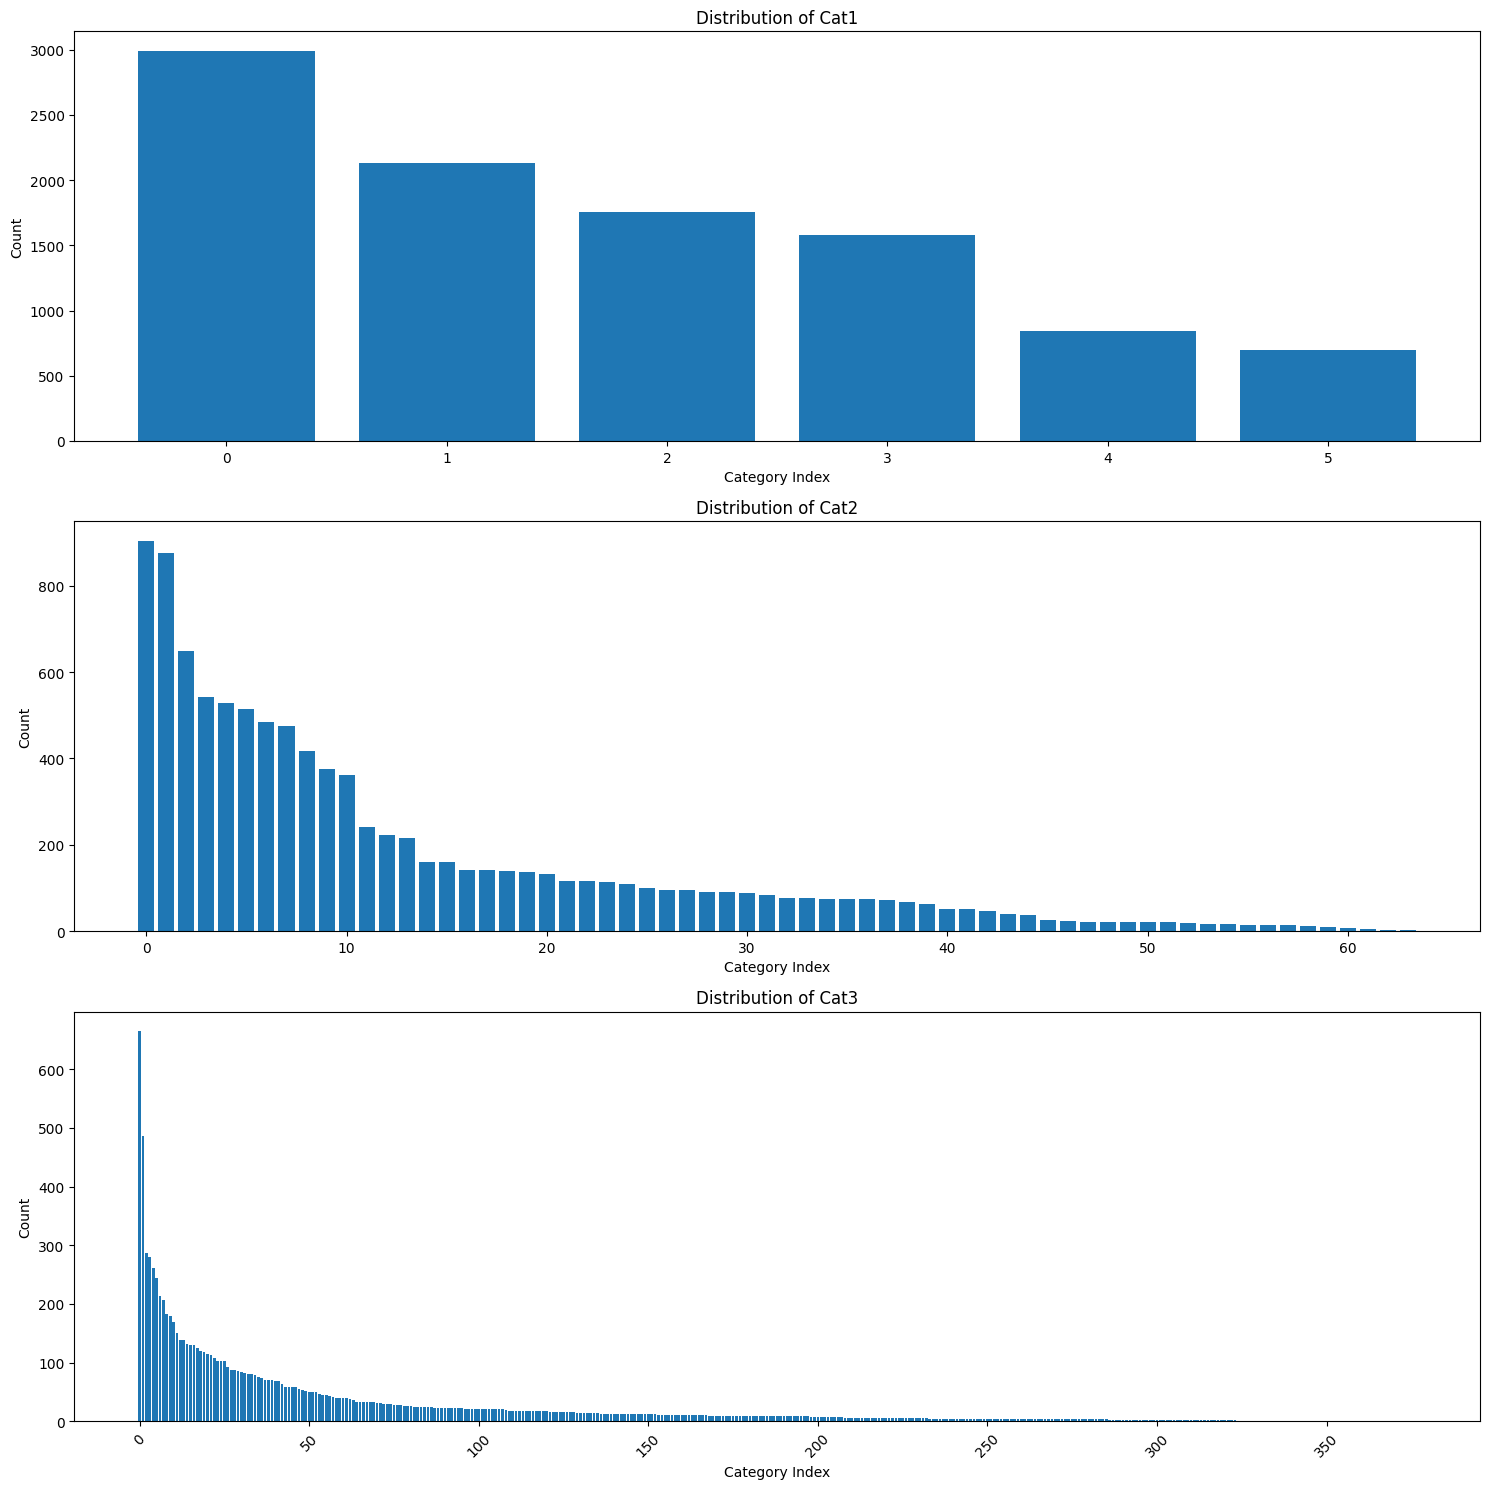

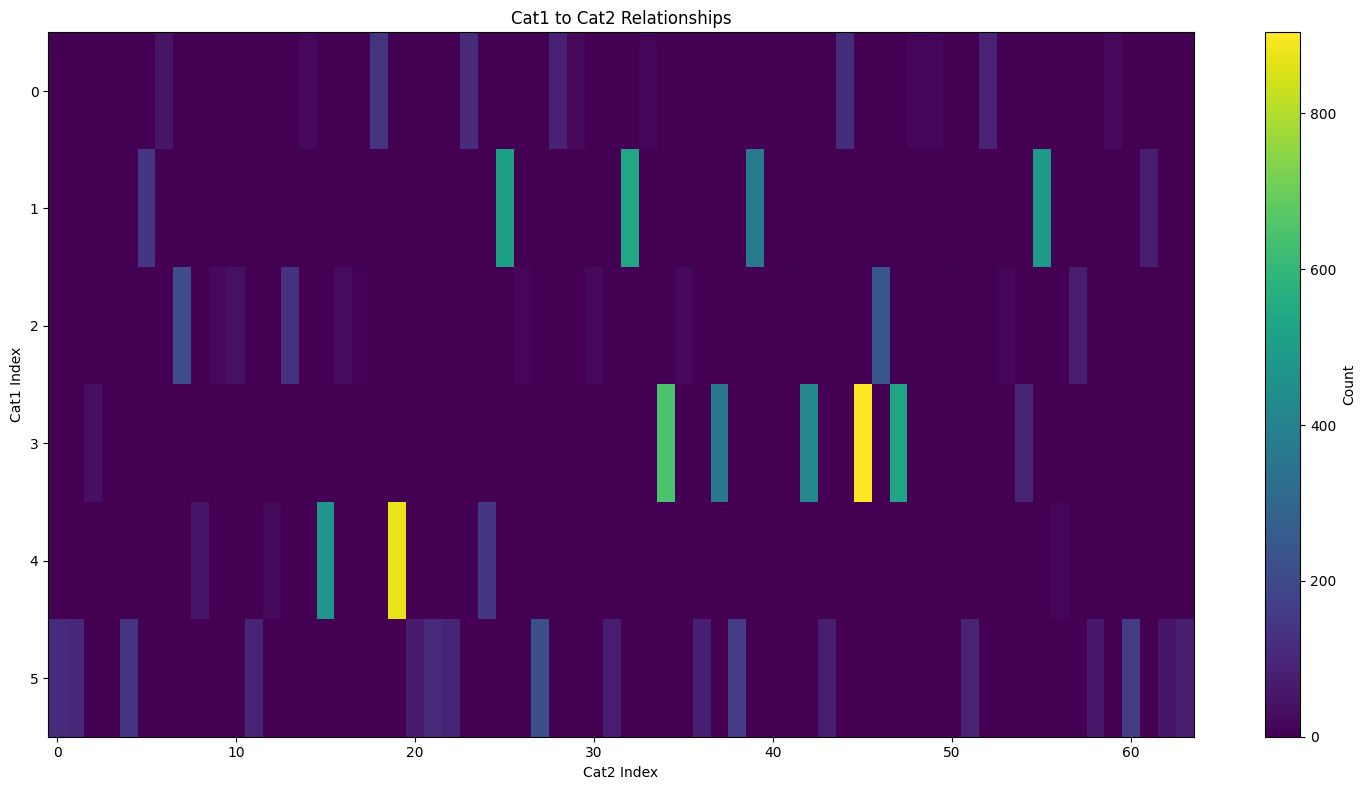

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

class HierarchyAnalyzer:
    def __init__(self, df):
        self.df = df
        # Use a basic matplotlib style instead of seaborn
        plt.style.use('default')
        self.analyze_hierarchy_characteristics()
        
    def analyze_hierarchy_characteristics(self):
        """Analyze characteristics of the hierarchical structure"""
        # Calculate basic hierarchy statistics
        self.hierarchy_stats = {
            'total_samples': len(self.df),
            'cat1_classes': self.df['Cat1'].nunique(),
            'cat2_classes': self.df['Cat2'].nunique(),
            'cat3_classes': self.df['Cat3'].nunique(),
            'total_paths': self.df.groupby(['Cat1', 'Cat2', 'Cat3']).ngroups,
            'avg_samples_per_cat1': len(self.df) / self.df['Cat1'].nunique(),
            'imbalance_ratio': self.calculate_imbalance_ratio()
        }
        
        # Analyze hierarchy structure
        self.hierarchy_structure = self.analyze_structure()
        
        # Print recommendations
        self.print_recommendations()
        
    def calculate_imbalance_ratio(self):
        """Calculate imbalance ratio for categories"""
        cat1_counts = self.df['Cat1'].value_counts()
        return cat1_counts.max() / cat1_counts.min()
    
    def analyze_structure(self):
        """Analyze the hierarchy structure"""
        structure = {
            'cat1_to_cat2': defaultdict(set),
            'cat2_to_cat3': defaultdict(set),
            'path_counts': defaultdict(int)
        }
        
        for _, row in self.df.iterrows():
            structure['cat1_to_cat2'][row['Cat1']].add(row['Cat2'])
            structure['cat2_to_cat3'][row['Cat2']].add(row['Cat3'])
            structure['path_counts'][(row['Cat1'], row['Cat2'], row['Cat3'])] += 1
            
        return structure
    
    def visualize_hierarchy(self):
        """Visualize hierarchy distributions"""
        fig, axes = plt.subplots(3, 1, figsize=(15, 15))
        
        # Plot distribution for each category level
        for i, cat in enumerate(['Cat1', 'Cat2', 'Cat3']):
            counts = self.df[cat].value_counts()
            axes[i].bar(range(len(counts)), counts.values)
            axes[i].set_title(f'Distribution of {cat}')
            axes[i].set_xlabel('Category Index')
            axes[i].set_ylabel('Count')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Plot category relationships
        self.plot_category_relationships()
    
    def plot_category_relationships(self):
        """Plot relationships between category levels"""
        # Cat1 to Cat2 relationships
        cat1_cat2_counts = self.df.groupby(['Cat1', 'Cat2']).size().unstack(fill_value=0)
        
        plt.figure(figsize=(15, 8))
        plt.imshow(cat1_cat2_counts, aspect='auto')
        plt.title('Cat1 to Cat2 Relationships')
        plt.xlabel('Cat2 Index')
        plt.ylabel('Cat1 Index')
        plt.colorbar(label='Count')
        plt.tight_layout()
        plt.show()
    
    def print_recommendations(self):
        """Print recommendations based on analysis"""
        print("\n=== Hierarchy Classification Approach Recommendations ===\n")
        
        print("1. Dataset Characteristics:")
        print(f"Total samples: {self.hierarchy_stats['total_samples']}")
        print(f"Number of classes: L1={self.hierarchy_stats['cat1_classes']}, "
              f"L2={self.hierarchy_stats['cat2_classes']}, "
              f"L3={self.hierarchy_stats['cat3_classes']}")
        print(f"Imbalance ratio: {self.hierarchy_stats['imbalance_ratio']:.2f}")
        
        # Calculate average children per node
        avg_children = np.mean([len(children) for children in 
                              self.hierarchy_structure['cat1_to_cat2'].values()])
        print(f"\nAverage children per node: {avg_children:.2f}")
        
        self.recommend_approaches()
    
    def recommend_approaches(self):
        """Recommend specific approaches based on analysis"""
        print("\n2. Recommended Approaches:\n")
        
        # Local Approach
        if self.hierarchy_stats['imbalance_ratio'] < 10:
            print("A. Local Approach (Level-by-Level):")
            print("   Recommended because:")
            print("   - Manageable class imbalance")
            print("   - Clear level separation possible")
            print("\n   Implementation example:")
            print("""
            class LocalClassifier:
                def __init__(self):
                    self.level1_clf = RandomForestClassifier()
                    self.level2_clfs = {}
                    self.level3_clfs = {}
                
                def fit(self, X, y1, y2, y3):
                    # Train level 1
                    self.level1_clf.fit(X, y1)
                    
                    # Train level 2 classifiers
                    for cat1 in np.unique(y1):
                        mask = y1 == cat1
                        self.level2_clfs[cat1] = RandomForestClassifier()
                        self.level2_clfs[cat1].fit(X[mask], y2[mask])
            """)
        
        # Global Approach
        if self.hierarchy_stats['total_paths'] < 100:
            print("\nB. Global Approach:")
            print("   Recommended because:")
            print("   - Manageable number of total paths")
            print("   - Can maintain hierarchical consistency")
            print("\n   Implementation example:")
            print("""
            class GlobalClassifier:
                def __init__(self):
                    self.classifier = RandomForestClassifier()
                
                def fit(self, X, y1, y2, y3):
                    # Create path labels
                    paths = [f"{a}/{b}/{c}" for a,b,c in zip(y1,y2,y3)]
                    self.classifier.fit(X, paths)
            """)
        
        # Neural Approach
        if self.hierarchy_stats['total_samples'] > 5000:
            print("\nC. Neural Network Approach:")
            print("   Recommended because:")
            print("   - Large dataset size")
            print("   - Complex hierarchical relationships")
            print("\n   Implementation example:")
            print("""
            class HierarchicalNN(nn.Module):
                def __init__(self, input_dim, cat1_dim, cat2_dim, cat3_dim):
                    super().__init__()
                    self.shared = nn.Linear(input_dim, 512)
                    self.cat1_head = nn.Linear(512, cat1_dim)
                    self.cat2_head = nn.Linear(512, cat2_dim)
                    self.cat3_head = nn.Linear(512, cat3_dim)
            """)

# Usage
def main():
    # Read the CSV file
    df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')
    
    # Initialize and run analyzer
    analyzer = HierarchyAnalyzer(df)
    
    # Visualize hierarchy
    analyzer.visualize_hierarchy()

if __name__ == "__main__":
    main()


In [99]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from typing import Dict, Tuple, List

class TextFeatureExtractor(BaseEstimator, TransformerMixin):
    """Custom transformer for text feature extraction"""
    def __init__(self, field, max_features=1000):
        self.field = field
        self.max_features = max_features
        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            stop_words='english',
            ngram_range=(1, 2)
        )
        
    def fit(self, X, y=None):
        # Fill NaN values with empty string
        text_data = X[self.field].fillna('')
        self.vectorizer.fit(text_data)
        return self
        
    def transform(self, X):
        # Fill NaN values with empty string
        text_data = X[self.field].fillna('')
        return self.vectorizer.transform(text_data)

class EnhancedHierarchicalClassifier:
    def __init__(
        self,
        text_max_features=1000,
        title_max_features=500,
        confidence_threshold=0.3,
        use_features_weights=True,
        use_class_weights=True
    ):
        self.text_max_features = text_max_features
        self.title_max_features = title_max_features
        self.confidence_threshold = confidence_threshold
        self.use_features_weights = use_features_weights
        self.use_class_weights = use_class_weights
        
        # Initialize feature extractors
        self.feature_extractors = [
            ('text', TextFeatureExtractor(
                field='Text',
                max_features=self.text_max_features
            )),
            ('title', TextFeatureExtractor(
                field='Title',
                max_features=self.title_max_features
            ))
        ]
        
        self.feature_extractor = FeatureUnion(self.feature_extractors)
        
        # Initialize classifiers and encoders
        self.classifiers = {
            'level1': None,
            'level2': {},
            'level3': {}
        }
        self.label_encoders = {
            'level1': LabelEncoder(),
            'level2': LabelEncoder(),
            'level3': LabelEncoder()
        }

    def preprocess_data(self, df):
        """Preprocess the input data"""
        df = df.copy()
        
        # Fill NaN values
        df['Text'] = df['Text'].fillna('')
        df['Title'] = df['Title'].fillna('')
        
        # Basic text cleaning
        df['Text'] = df['Text'].str.lower().str.strip()
        df['Title'] = df['Title'].str.lower().str.strip()
        
        # Remove special characters (optional)
        df['Text'] = df['Text'].str.replace(r'[^\w\s]', ' ', regex=True)
        df['Title'] = df['Title'].str.replace(r'[^\w\s]', ' ', regex=True)
        
        return df
    
    def _create_classifier(self, level: str, cat1: str = None, cat2: str = None):
        """Create a classifier with appropriate parameters"""
        return RandomForestClassifier(
            n_estimators=100,
            class_weight='balanced' if self.use_class_weights else None,
            n_jobs=-1,
            random_state=42
        )
    
    def fit(self, df: pd.DataFrame, verbose: bool = True):
        """Fit the hierarchical classifier"""
        if verbose:
            print("Preprocessing data...")
        
        # Preprocess data
        df = self.preprocess_data(df)
        
        if verbose:
            print("Extracting features...")
        
        # Extract features
        X = self.feature_extractor.fit_transform(df)
        
        # Encode labels
        y1_encoded = self.label_encoders['level1'].fit_transform(df['Cat1'])
        y2_encoded = self.label_encoders['level2'].fit_transform(df['Cat2'])
        y3_encoded = self.label_encoders['level3'].fit_transform(df['Cat3'])
        
        # Train level 1
        if verbose:
            print("Training Level 1 classifier...")
        
        self.classifiers['level1'] = self._create_classifier('level1')
        self.classifiers['level1'].fit(X, y1_encoded)
        
        # Train level 2 classifiers
        if verbose:
            print("Training Level 2 classifiers...")
        
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            if sum(mask) > 0:
                clf = self._create_classifier('level2', cat1)
                clf.fit(X[mask], y2_encoded[mask])
                self.classifiers['level2'][cat1] = clf
        
        # Train level 3 classifiers
        if verbose:
            print("Training Level 3 classifiers...")
        
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                if sum(mask) > 0:
                    clf = self._create_classifier('level3', cat1, cat2)
                    clf.fit(X[mask], y3_encoded[mask])
                    self.classifiers['level3'][(cat1, cat2)] = clf
    
    def predict(self, df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        """Predict classes for all levels"""
        # Preprocess data
        df = self.preprocess_data(df)
        
        # Extract features
        X = self.feature_extractor.transform(df)
        
        # Level 1 prediction
        y1_proba = self.classifiers['level1'].predict_proba(X)
        y1_pred = np.where(
            y1_proba.max(axis=1) >= self.confidence_threshold,
            self.label_encoders['level1'].inverse_transform(y1_proba.argmax(axis=1)),
            'unknown'
        )
        
        # Level 2 prediction
        y2_pred = np.array(['unknown'] * len(df))
        for cat1 in self.classifiers['level2']:
            mask = y1_pred == cat1
            if sum(mask) > 0:
                proba = self.classifiers['level2'][cat1].predict_proba(X[mask])
                pred = self.label_encoders['level2'].inverse_transform(proba.argmax(axis=1))
                y2_pred[mask] = np.where(
                    proba.max(axis=1) >= self.confidence_threshold,
                    pred,
                    'unknown'
                )
        
        # Level 3 prediction
        y3_pred = np.array(['unknown'] * len(df))
        for (cat1, cat2) in self.classifiers['level3']:
            mask = (y1_pred == cat1) & (y2_pred == cat2)
            if sum(mask) > 0:
                proba = self.classifiers['level3'][(cat1, cat2)].predict_proba(X[mask])
                pred = self.label_encoders['level3'].inverse_transform(proba.argmax(axis=1))
                y3_pred[mask] = np.where(
                    proba.max(axis=1) >= self.confidence_threshold,
                    pred,
                    'unknown'
                )
        
        return y1_pred, y2_pred, y3_pred

def evaluate_model(df_train: pd.DataFrame, df_test: pd.DataFrame):
    """Train and evaluate model"""
    # Check for missing values
    print("\nMissing values in training data:")
    print(df_train.isnull().sum())
    
    print("\nMissing values in test data:")
    print(df_test.isnull().sum())
    
    # Initialize model
    model = EnhancedHierarchicalClassifier(
        text_max_features=1000,
        title_max_features=500,
        confidence_threshold=0.3
    )
    
    print("\nTraining model...")
    model.fit(df_train)
    
    print("\nMaking predictions...")
    y1_pred, y2_pred, y3_pred = model.predict(df_test)
    
    # Evaluate
    print("\nEvaluation Results:")
    for level, (pred, true) in enumerate([
        (y1_pred, df_test['Cat1']),
        (y2_pred, df_test['Cat2']),
        (y3_pred, df_test['Cat3'])
    ], 1):
        print(f"\nLevel {level} Performance:")
        print(classification_report(true, pred))

# Example usage
if __name__ == "__main__":
    # Load data
    df = transformed_df
    
    # Print initial data info
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Split data
    from sklearn.model_selection import train_test_split
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
    
    # Train and evaluate
    evaluate_model(df_train, df_test)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   productId  10000 non-null  object
 1   Title      9995 non-null   object
 2   userId     10000 non-null  object
 3   Time       10000 non-null  int64 
 4   Text       10000 non-null  object
 5   Cat1       10000 non-null  object
 6   Cat2       10000 non-null  object
 7   Cat3       10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB
None

Missing Values:
productId    0
Title        5
userId       0
Time         0
Text         0
Cat1         0
Cat2         0
Cat3         0
dtype: int64

Missing values in training data:
productId    0
Title        3
userId       0
Time         0
Text         0
Cat1         0
Cat2         0
Cat3         0
dtype: int64

Missing values in test data:
productId    0
Title        2
userId       0
Time         0
Text         0
Cat1      

/Users/nbhagat/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nbhagat/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nbhagat/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nbhagat/L

In [40]:
class ImprovedHierarchicalClassifier:
    def __init__(
        self,
        text_max_features=1000,
        title_max_features=500,
        confidence_threshold=0.3,
        min_samples_per_class=5
    ):
        self.text_max_features = text_max_features
        self.title_max_features = title_max_features
        self.confidence_threshold = confidence_threshold
        self.min_samples_per_class = min_samples_per_class
        
        # Feature extractors
        self.feature_extractors = [
            ('text', TextFeatureExtractor(
                field='Text',
                max_features=self.text_max_features
            )),
            ('title', TextFeatureExtractor(
                field='Title',
                max_features=self.title_max_features
            ))
        ]
        
        self.feature_extractor = FeatureUnion(self.feature_extractors)
        
        # Initialize classifiers and encoders
        self.classifiers = {
            'level1': None,
            'level2': {},
            'level3': {}
        }
        
        # Separate label encoders for each category path
        self.label_encoders = {
            'level1': LabelEncoder(),
            'level2': {},
            'level3': {}
        }
        
        # Store unique classes
        self.unique_classes = {
            'level1': None,
            'level2': {},
            'level3': {}
        }

    def _create_classifier(self, level):
        if level == 'level1':
            return RandomForestClassifier(
                n_estimators=200,
                class_weight='balanced',
                n_jobs=-1,
                random_state=42
            )
        elif level == 'level2':
            return RandomForestClassifier(
                n_estimators=150,
                class_weight='balanced_subsample',
                min_samples_leaf=2,
                n_jobs=-1,
                random_state=42
            )
        else:
            return RandomForestClassifier(
                n_estimators=100,
                class_weight='balanced_subsample',
                min_samples_leaf=1,
                n_jobs=-1,
                random_state=42
            )

    def preprocess_data(self, df):
        """Preprocess the input data"""
        df = df.copy()
        df['Text'] = df['Text'].fillna('')
        df['Title'] = df['Title'].fillna('')
        df['Text'] = df['Text'].str.lower().str.strip()
        df['Title'] = df['Title'].str.lower().str.strip()
        return df

    def fit(self, df: pd.DataFrame, verbose: bool = True):
        """Fit the hierarchical classifier"""
        # Preprocess data
        df = self.preprocess_data(df)
        
        # Extract features
        X = self.feature_extractor.fit_transform(df)
        
        # Train level 1
        if verbose:
            print("Training Level 1 classifier...")
        
        # Fit level 1 encoder and store unique classes
        y1_encoded = self.label_encoders['level1'].fit_transform(df['Cat1'])
        self.unique_classes['level1'] = self.label_encoders['level1'].classes_
        
        self.classifiers['level1'] = self._create_classifier('level1')
        self.classifiers['level1'].fit(X, y1_encoded)
        
        # Train level 2 classifiers
        if verbose:
            print("Training Level 2 classifiers...")
        
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            if sum(mask) >= self.min_samples_per_class:
                X_subset = X[mask]
                y2_subset = df[mask]['Cat2']
                
                if len(y2_subset.unique()) >= 2:
                    # Create new encoder for this category path
                    self.label_encoders['level2'][cat1] = LabelEncoder()
                    y2_encoded = self.label_encoders['level2'][cat1].fit_transform(y2_subset)
                    self.unique_classes['level2'][cat1] = self.label_encoders['level2'][cat1].classes_
                    
                    clf = self._create_classifier('level2')
                    clf.fit(X_subset, y2_encoded)
                    self.classifiers['level2'][cat1] = clf
        
        # Train level 3 classifiers
        if verbose:
            print("Training Level 3 classifiers...")
        
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                if sum(mask) >= self.min_samples_per_class:
                    X_subset = X[mask]
                    y3_subset = df[mask]['Cat3']
                    
                    if len(y3_subset.unique()) >= 2:
                        # Create new encoder for this category path
                        self.label_encoders['level3'][(cat1, cat2)] = LabelEncoder()
                        y3_encoded = self.label_encoders['level3'][(cat1, cat2)].fit_transform(y3_subset)
                        self.unique_classes['level3'][(cat1, cat2)] = self.label_encoders['level3'][(cat1, cat2)].classes_
                        
                        clf = self._create_classifier('level3')
                        clf.fit(X_subset, y3_encoded)
                        self.classifiers['level3'][(cat1, cat2)] = clf

    def predict_proba(self, X):
        """Predict probability for each level with sparse matrix handling"""
        # Convert sparse matrix to dense if needed
        if scipy.sparse.issparse(X):
            X = X.toarray()
            
        # Level 1 probabilities
        y1_proba = self.classifiers['level1'].predict_proba(X)
        y1_pred = self.label_encoders['level1'].inverse_transform(y1_proba.argmax(axis=1))
        
        # Initialize level 2 probabilities
        max_level2_classes = max(
            len(classes) for classes in self.unique_classes['level2'].values()
        ) if self.unique_classes['level2'] else 0
        y2_proba = np.zeros((X.shape[0], max_level2_classes))
        
        # Get level 2 probabilities
        for cat1, clf in self.classifiers['level2'].items():
            mask = y1_pred == cat1
            if np.sum(mask) > 0:
                proba = clf.predict_proba(X[mask])
                # Pad probabilities if necessary
                if proba.shape[1] < max_level2_classes:
                    pad_width = max_level2_classes - proba.shape[1]
                    proba = np.pad(proba, ((0, 0), (0, pad_width)), 'constant')
                y2_proba[mask] = proba
        
        # Initialize level 3 probabilities
        max_level3_classes = max(
            len(classes) for classes in self.unique_classes['level3'].values()
        ) if self.unique_classes['level3'] else 0
        y3_proba = np.zeros((X.shape[0], max_level3_classes))
        
        # Get level 2 predictions for level 3
        y2_pred = np.array(['unknown'] * len(X))
        for cat1 in self.classifiers['level2']:
            mask = y1_pred == cat1
            if np.sum(mask) > 0 and cat1 in self.label_encoders['level2']:
                y2_pred[mask] = self.label_encoders['level2'][cat1].inverse_transform(
                    y2_proba[mask][:, :len(self.unique_classes['level2'][cat1])].argmax(axis=1)
                )
        
        # Get level 3 probabilities
        for (cat1, cat2), clf in self.classifiers['level3'].items():
            mask = (y1_pred == cat1) & (y2_pred == cat2)
            if np.sum(mask) > 0:
                proba = clf.predict_proba(X[mask])
                if proba.shape[1] < max_level3_classes:
                    pad_width = max_level3_classes - proba.shape[1]
                    proba = np.pad(proba, ((0, 0), (0, pad_width)), 'constant')
                y3_proba[mask] = proba
        
        return y1_proba, y2_proba, y3_proba

    def predict(self, df: pd.DataFrame):
        """Predict with confidence thresholding"""
        # Preprocess data
        df = self.preprocess_data(df)
        X = self.feature_extractor.transform(df)
        
        # Convert sparse matrix to dense if needed
        if scipy.sparse.issparse(X):
            X = X.toarray()
        
        # Get probabilities
        y1_proba, y2_proba, y3_proba = self.predict_proba(X)
        
        # Level 1 predictions
        y1_pred = np.where(
            y1_proba.max(axis=1) >= self.confidence_threshold,
            self.label_encoders['level1'].inverse_transform(y1_proba.argmax(axis=1)),
            'unknown'
        )
        
        # Level 2 predictions
        y2_pred = np.array(['unknown'] * len(X))
        for cat1 in self.classifiers['level2']:
            mask = y1_pred == cat1
            if np.sum(mask) > 0 and cat1 in self.label_encoders['level2']:
                proba = y2_proba[mask][:, :len(self.unique_classes['level2'][cat1])]
                y2_pred[mask] = np.where(
                    proba.max(axis=1) >= self.confidence_threshold,
                    self.label_encoders['level2'][cat1].inverse_transform(proba.argmax(axis=1)),
                    'unknown'
                )
        
        # Level 3 predictions
        y3_pred = np.array(['unknown'] * len(X))
        for (cat1, cat2), clf in self.classifiers['level3'].items():
            mask = (y1_pred == cat1) & (y2_pred == cat2)
            if np.sum(mask) > 0:
                proba = y3_proba[mask][:, :len(self.unique_classes['level3'][(cat1, cat2)])]
                y3_pred[mask] = np.where(
                    proba.max(axis=1) >= self.confidence_threshold,
                    self.label_encoders['level3'][(cat1, cat2)].inverse_transform(proba.argmax(axis=1)),
                    'unknown'
                )
        
        return y1_pred, y2_pred, y3_pred


In [ ]:
# Initialize classifier
classifier = ImprovedHierarchicalClassifier(
    text_max_features=1000,
    title_max_features=500,
    confidence_threshold=0.3,
    min_samples_per_class=5
)

# Split data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Train
classifier.fit(df_train)

# Predict
y1_pred, y2_pred, y3_pred = classifier.predict(df_test)

# Evaluate
for level, (pred, true) in enumerate([
    (y1_pred, df_test['Cat1']),
    (y2_pred, df_test['Cat2']),
    (y3_pred, df_test['Cat3'])
], 1):
    print(f"\nLevel {level} Performance:")
    print(classification_report(true, pred))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [41]:
df = transformed_df

In [47]:
df.groupby(['Cat1','Cat2','Cat3']).count()

productId  \
Cat1          Cat2                    Cat3                                                  
baby products Other_baby products     accessories                                      18   
                                      car seats                                         1   
                                      maternity pillows                                14   
                                      potties seats                                    10   
                                      step stools                                       3   
...                                                                                   ...   
toys games    tricycles               scooters wagons                                  51   
              vehicles remote control Other_toys games_vehicles remote control          1   
                                      play trains railway sets                         33   
                                      play vehicles                                    22   
                                      vehicle playsets                                 19   

                                                                                Title  \
Cat1          Cat2                    Cat3                                              
baby products Other_baby products     accessories                                  18   
                                      car seats                                     1   
                                      maternity pillows                            14   
                                      potties seats                                10   
                                      step stools                                   3   
...                                                                               ...   
toys games    tricycles               scooters wagons                              51   
              vehicles remote control Other_toys games_vehicles remote control      1   
                                      play trains railway sets                     33   
                                      play vehicles                                22   
                                      vehicle playsets                             19   

                                                                                userId  \
Cat1          Cat2                    Cat3                                               
baby products Other_baby products     accessories                                   18   
                                      car seats                                      1   
                                      maternity pillows                             14   
                                      potties seats                                 10   
                                      step stools                                    3   
...                                                                                ...   
toys games    tricycles               scooters wagons                               51   
              vehicles remote control Other_toys games_vehicles remote control       1   
                                      play trains railway sets                      33   
                                      play vehicles                                 22   
                                      vehicle playsets                              19   

                                                                                Time  \
Cat1          Cat2                    Cat3                                             
baby products Other_baby products     accessories                                 18   
                                      car seats                                    1   
                                      maternity pillows                           14   
                                      potties seats                               10   
             

In [ ]:
import numpy as np
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Analyzing category distributions...
=== Category Distribution Analysis ===

Level 1 Statistics:
Total categories: 6
Sample statistics:
count       6.000000
mean     1666.666667
std       850.209778
min       698.000000
25%      1024.000000
50%      1667.500000
75%      2041.000000
max      2992.000000
Name: count, dtype: float64

Top 10 categories:
Cat1
health personal care    2992
beauty                  2135
toys games              1759
pet supplies            1576
grocery gourmet food     840
baby products            698
Name: count, dtype: int64

Bottom 10 categories:
Cat1
health personal care    2992
beauty                  2135
toys games              1759
pet supplies            1576
grocery gourmet food     840
baby products            698
Name: count, dtype: int64

Level 2 Statistics:
Total combinations: 64
Sample statistics:
count     64.000000
mean     156.250000
std      205.224538
min        2.000000
25%       22.000000
50%       80.500000
75%      146.750000
max      904.

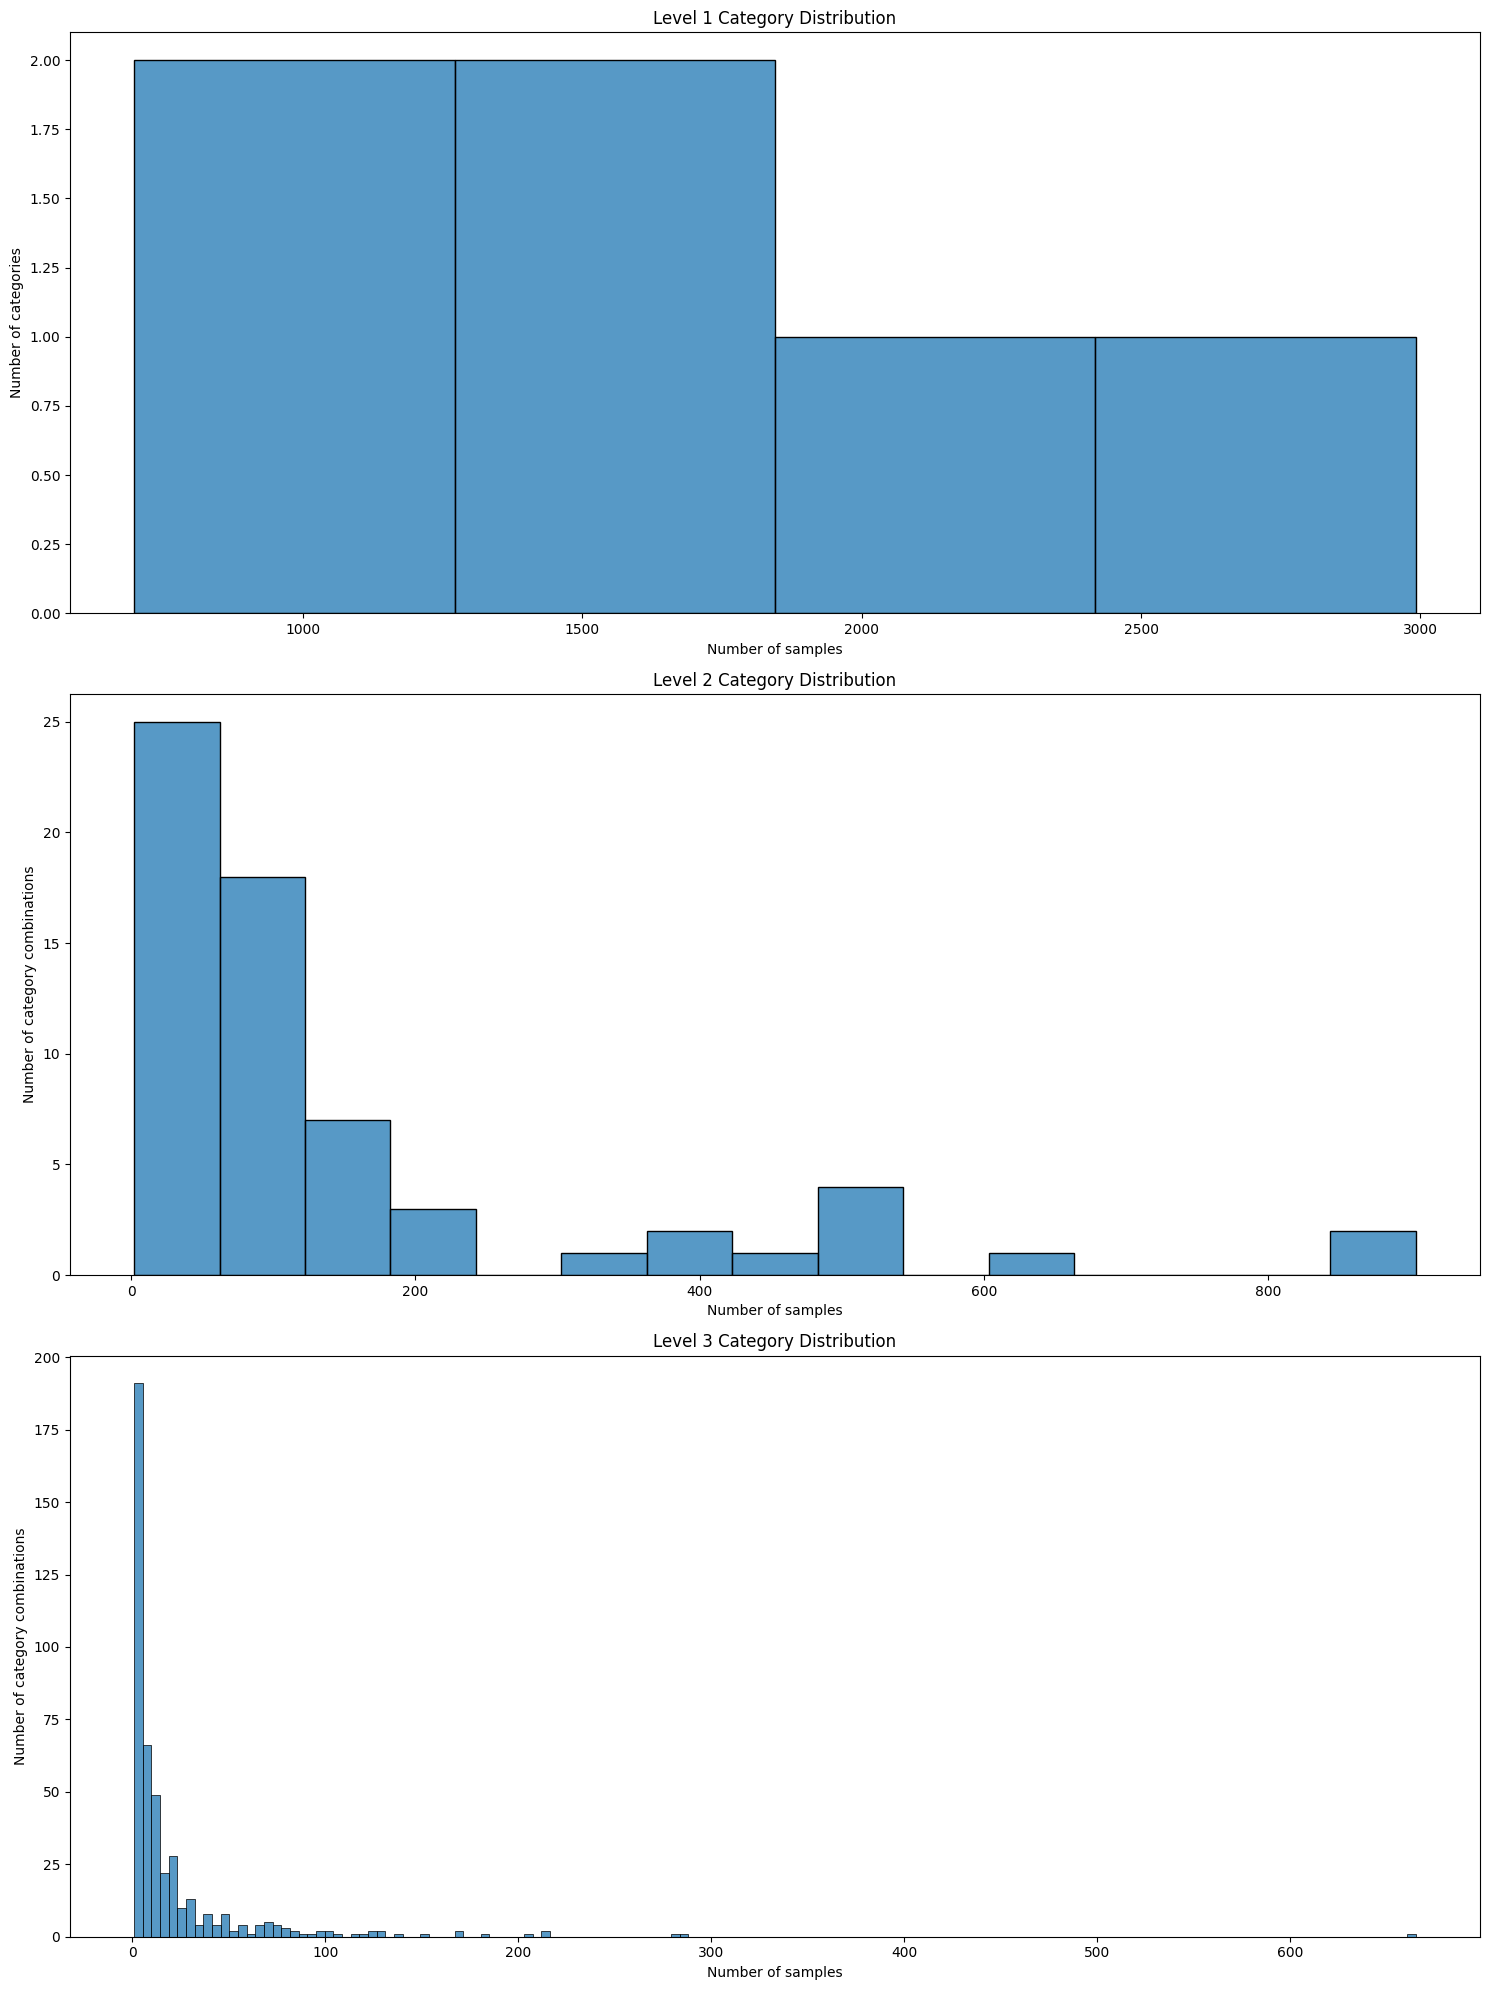


Analyzing threshold impacts...


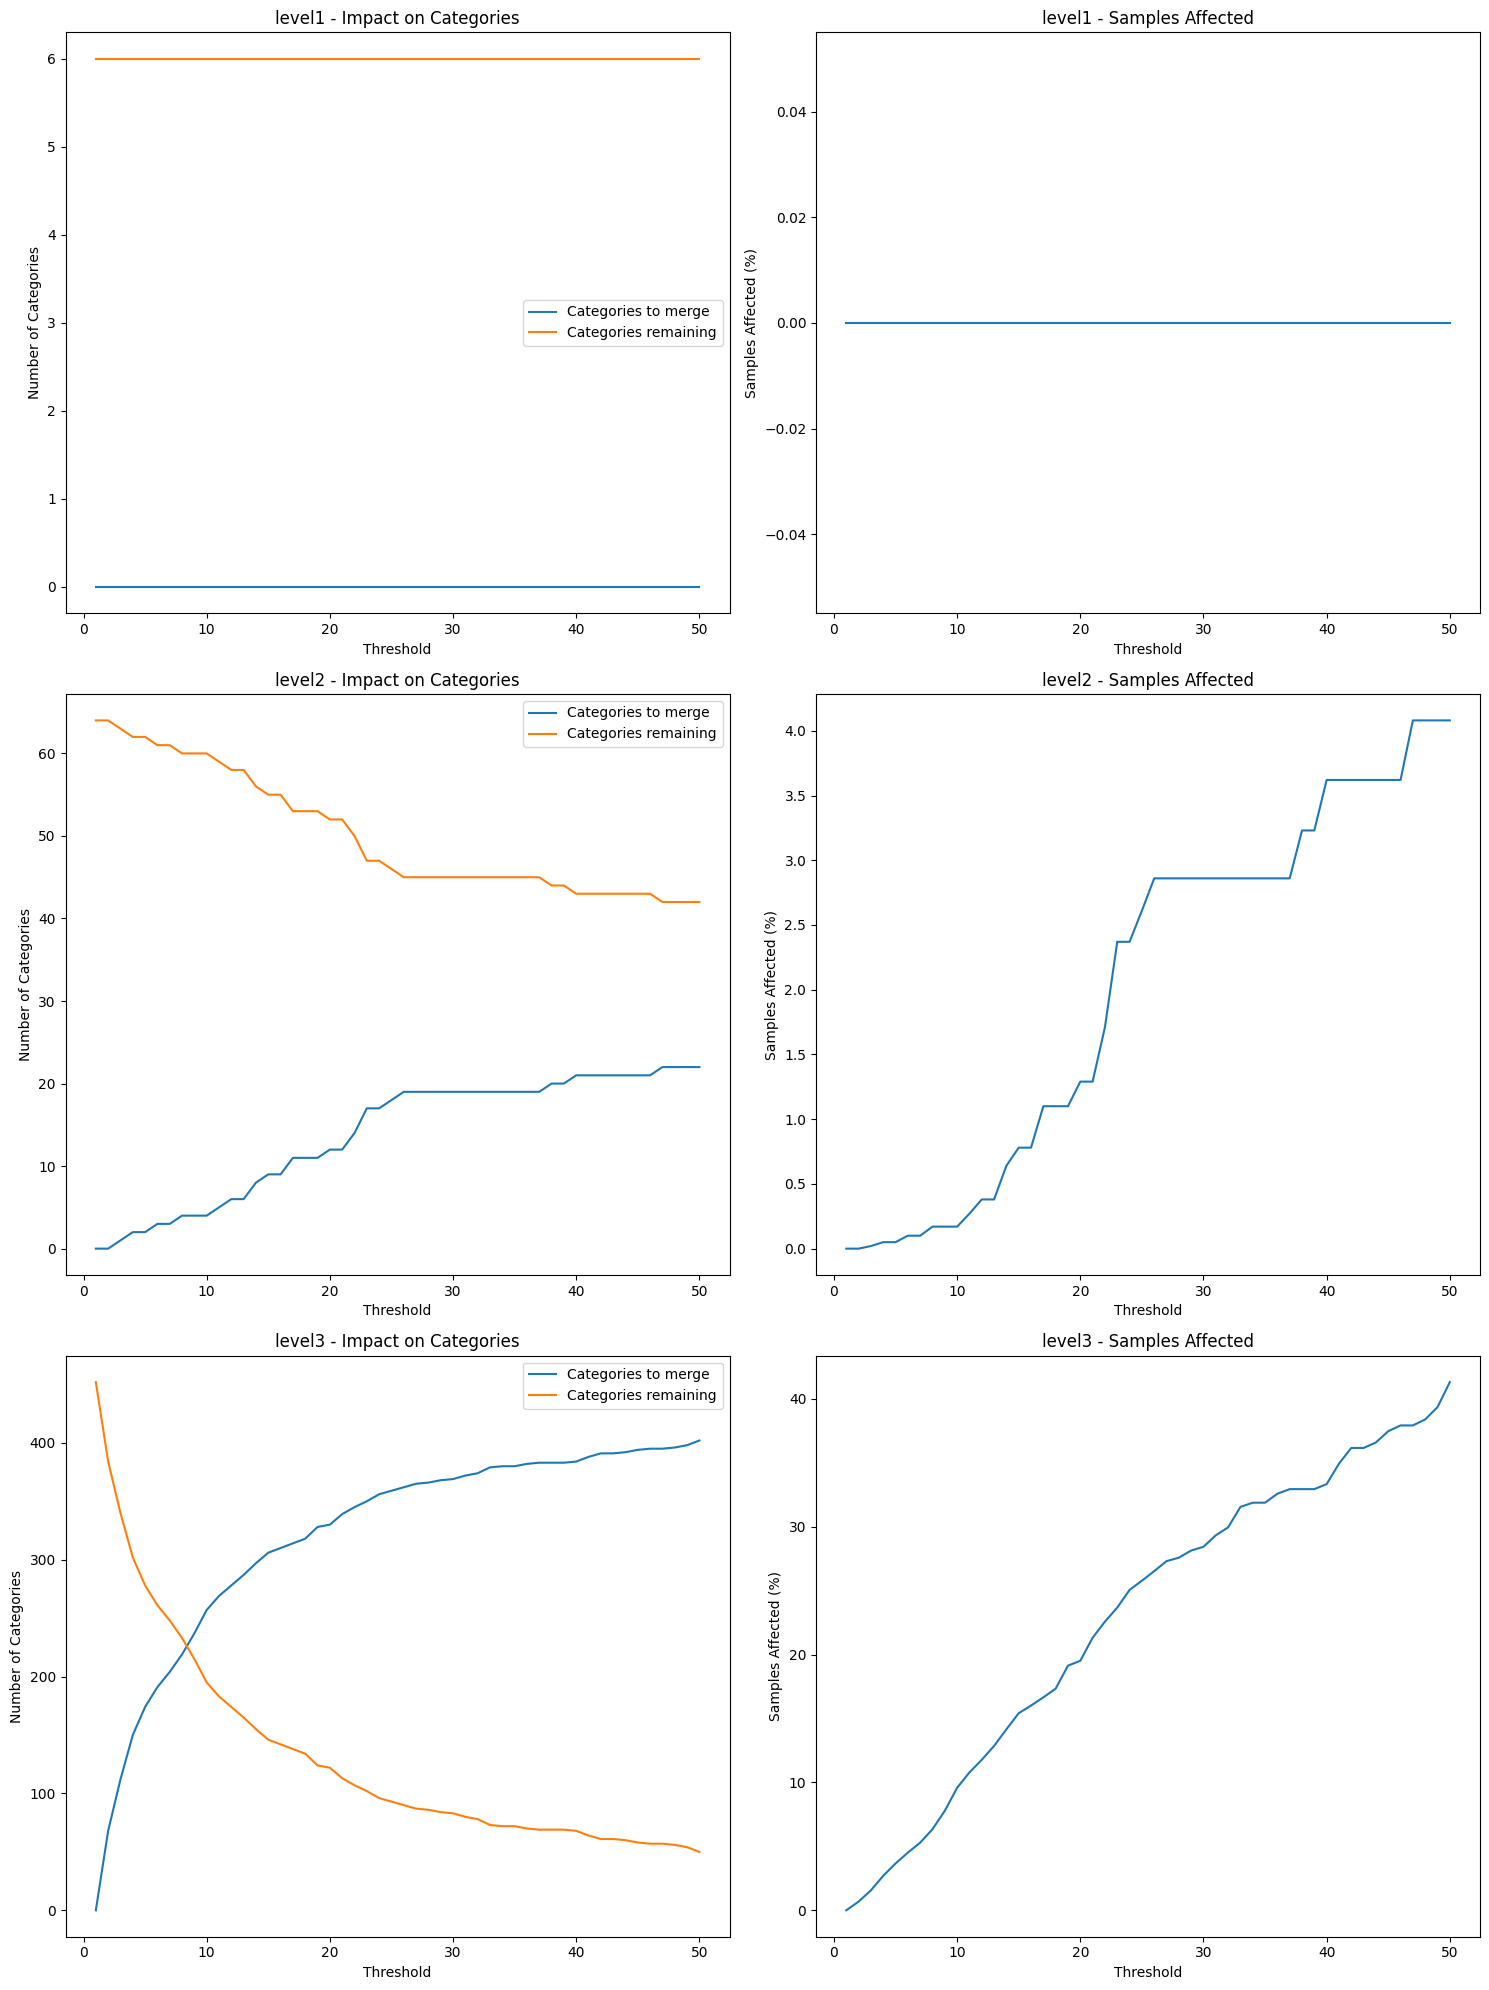


Analyzing hierarchical relationships...

=== Hierarchical Relationship Analysis ===

Cat2 categories per Cat1:
Average: 10.67
Min: 6
Max: 17

Distribution:
count     6.000000
mean     10.666667
std       5.046451
min       6.000000
25%       6.250000
50%       9.500000
75%      15.000000
max      17.000000
Name: Cat2, dtype: float64


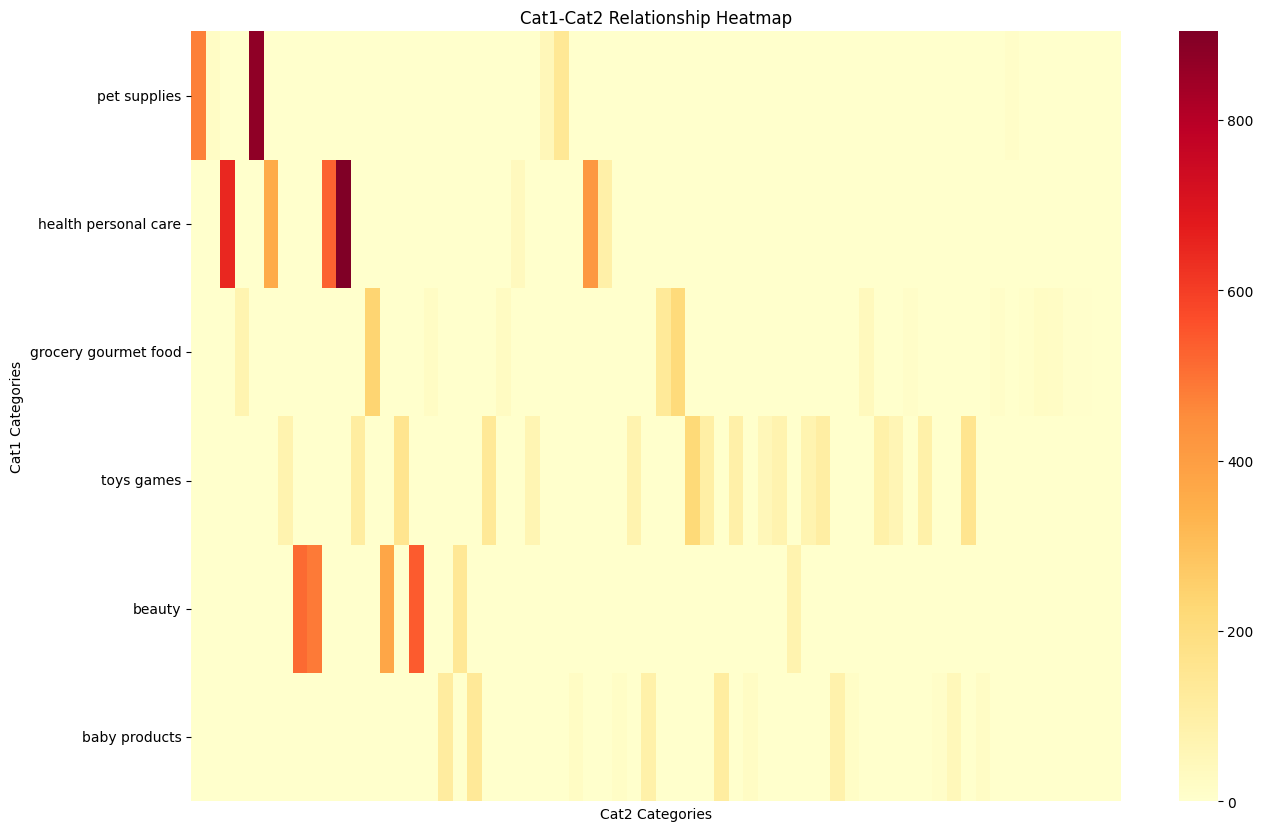


=== Recommended Thresholds ===

level1:
Recommended threshold: 2.0
Samples affected: 0.00%
Categories to merge: 0.0
Categories remaining: 6.0

level2:
Recommended threshold: 8.0
Samples affected: 0.17%
Categories to merge: 4.0
Categories remaining: 60.0

level3:
Recommended threshold: 6.0
Samples affected: 4.51%
Categories to merge: 191.0
Categories remaining: 261.0


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

class CategoryAnalyzer:
    def __init__(self, df):
        self.df = df
        self.category_stats = {}
        self.threshold_analysis = {}
        
    def analyze_category_distributions(self):
        """Analyze the distribution of categories at each level"""
        print("=== Category Distribution Analysis ===")
        
        # Level 1 Analysis
        l1_counts = self.df['Cat1'].value_counts()
        l2_counts = self.df.groupby(['Cat1', 'Cat2']).size()
        l3_counts = self.df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        
        self.category_stats = {
            'level1': l1_counts,
            'level2': l2_counts,
            'level3': l3_counts
        }
        
        # Print detailed statistics
        print("\nLevel 1 Statistics:")
        print(f"Total categories: {len(l1_counts)}")
        print(f"Sample statistics:\n{l1_counts.describe()}")
        print("\nTop 10 categories:")
        print(l1_counts.head(10))
        print("\nBottom 10 categories:")
        print(l1_counts.tail(10))
        
        print("\nLevel 2 Statistics:")
        print(f"Total combinations: {len(l2_counts)}")
        print(f"Sample statistics:\n{l2_counts.describe()}")
        print("\nTop 10 combinations:")
        print(l2_counts.head(10))
        
        print("\nLevel 3 Statistics:")
        print(f"Total combinations: {len(l3_counts)}")
        print(f"Sample statistics:\n{l3_counts.describe()}")
        print("\nTop 10 combinations:")
        print(l3_counts.head(10))

    def plot_category_distributions(self):
        """Plot category distributions"""
        fig, axes = plt.subplots(3, 1, figsize=(15, 20))
        
        # Level 1 distribution
        sns.histplot(data=self.category_stats['level1'], ax=axes[0])
        axes[0].set_title('Level 1 Category Distribution')
        axes[0].set_xlabel('Number of samples')
        axes[0].set_ylabel('Number of categories')
        
        # Level 2 distribution
        sns.histplot(data=self.category_stats['level2'], ax=axes[1])
        axes[1].set_title('Level 2 Category Distribution')
        axes[1].set_xlabel('Number of samples')
        axes[1].set_ylabel('Number of category combinations')
        
        # Level 3 distribution
        sns.histplot(data=self.category_stats['level3'], ax=axes[2])
        axes[2].set_title('Level 3 Category Distribution')
        axes[2].set_xlabel('Number of samples')
        axes[2].set_ylabel('Number of category combinations')
        
        plt.tight_layout()
        plt.show()

    def analyze_thresholds(self, max_threshold=50):
        """Analyze impact of different thresholds"""
        thresholds = range(1, max_threshold + 1)
        
        results = {
            'level1': [],
            'level2': [],
            'level3': []
        }
        
        # Analyze each level
        for level in ['level1', 'level2', 'level3']:
            counts = self.category_stats[level]
            for threshold in thresholds:
                rare_cats = sum(counts < threshold)
                total_samples_affected = counts[counts < threshold].sum()
                results[level].append({
                    'threshold': threshold,
                    'rare_categories': rare_cats,
                    'categories_remaining': len(counts) - rare_cats,
                    'samples_affected': total_samples_affected,
                    'samples_affected_pct': (total_samples_affected / len(self.df)) * 100
                })
        
        self.threshold_analysis = {
            level: pd.DataFrame(data) 
            for level, data in results.items()
        }

    def plot_threshold_impact(self):
        """Plot threshold impact analysis"""
        fig, axes = plt.subplots(3, 2, figsize=(15, 20))
        
        for i, level in enumerate(['level1', 'level2', 'level3']):
            data = self.threshold_analysis[level]
            
            # Categories plot
            axes[i, 0].plot(data['threshold'], data['rare_categories'], 
                          label='Categories to merge')
            axes[i, 0].plot(data['threshold'], data['categories_remaining'], 
                          label='Categories remaining')
            axes[i, 0].set_title(f'{level} - Impact on Categories')
            axes[i, 0].set_xlabel('Threshold')
            axes[i, 0].set_ylabel('Number of Categories')
            axes[i, 0].legend()
            
            # Samples affected plot
            axes[i, 1].plot(data['threshold'], data['samples_affected_pct'])
            axes[i, 1].set_title(f'{level} - Samples Affected')
            axes[i, 1].set_xlabel('Threshold')
            axes[i, 1].set_ylabel('Samples Affected (%)')
            
        plt.tight_layout()
        plt.show()

    def analyze_hierarchical_relationships(self):
        """Analyze relationships between category levels"""
        print("\n=== Hierarchical Relationship Analysis ===")
        
        # Analyze Cat1 to Cat2 relationships
        cat1_cat2_counts = self.df.groupby('Cat1')['Cat2'].nunique()
        print("\nCat2 categories per Cat1:")
        print(f"Average: {cat1_cat2_counts.mean():.2f}")
        print(f"Min: {cat1_cat2_counts.min()}")
        print(f"Max: {cat1_cat2_counts.max()}")
        print("\nDistribution:")
        print(cat1_cat2_counts.describe())
        
        # Create relationship matrix for visualization
        cat1_unique = self.df['Cat1'].unique()
        cat2_unique = self.df['Cat2'].unique()
        relationship_matrix = pd.DataFrame(
            0, 
            index=cat1_unique, 
            columns=cat2_unique
        )
        
        for cat1 in cat1_unique:
            cat2_counts = self.df[self.df['Cat1'] == cat1]['Cat2'].value_counts()
            relationship_matrix.loc[cat1, cat2_counts.index] = cat2_counts.values
        
        # Plot relationship heatmap
        plt.figure(figsize=(15, 10))
        sns.heatmap(relationship_matrix, cmap='YlOrRd', xticklabels=False)
        plt.title('Cat1-Cat2 Relationship Heatmap')
        plt.xlabel('Cat2 Categories')
        plt.ylabel('Cat1 Categories')
        plt.show()

    def recommend_thresholds(self):
        """Recommend thresholds based on analysis"""
        recommendations = {}
        
        for level in ['level1', 'level2', 'level3']:
            data = self.threshold_analysis[level]
            
            # Find elbow point
            diffs = np.diff(data['samples_affected_pct'])
            elbow_idx = np.argmin(np.abs(diffs - np.mean(diffs))) + 1
            recommended_threshold = data.iloc[elbow_idx]['threshold']
            
            # Calculate impact
            impact = data[data['threshold'] == recommended_threshold].iloc[0]
            
            recommendations[level] = {
                'recommended_threshold': recommended_threshold,
                'samples_affected_pct': impact['samples_affected_pct'],
                'categories_reduced': impact['rare_categories'],
                'categories_remaining': impact['categories_remaining']
            }
        
        return recommendations

def main():
    # Load data
    df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')
    
    # Initialize analyzer
    analyzer = CategoryAnalyzer(df)
    
    # Perform distribution analysis
    print("Analyzing category distributions...")
    analyzer.analyze_category_distributions()
    analyzer.plot_category_distributions()
    
    # Analyze thresholds
    print("\nAnalyzing threshold impacts...")
    analyzer.analyze_thresholds(max_threshold=50)
    analyzer.plot_threshold_impact()
    
    # Analyze hierarchical relationships
    print("\nAnalyzing hierarchical relationships...")
    analyzer.analyze_hierarchical_relationships()
    
    # Get recommendations
    recommendations = analyzer.recommend_thresholds()
    
    print("\n=== Recommended Thresholds ===")
    for level, rec in recommendations.items():
        print(f"\n{level}:")
        print(f"Recommended threshold: {rec['recommended_threshold']}")
        print(f"Samples affected: {rec['samples_affected_pct']:.2f}%")
        print(f"Categories to merge: {rec['categories_reduced']}")
        print(f"Categories remaining: {rec['categories_remaining']}")

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

class CategoryMerger:
    def __init__(self, thresholds={'level2': 20, 'level3': 10}):
        self.thresholds = thresholds
        self.category_maps = {
            'level2': defaultdict(dict),
            'level3': defaultdict(lambda: defaultdict(dict))
        }
        self.statistics = {}
        
    def fit(self, df):
        """Learn category mapping based on frequencies and handle unknown values"""
        print("Analyzing category distributions...")
        
        # Store original statistics
        self.statistics['original'] = {
            'level1_counts': df['Cat1'].value_counts(),
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }
        
        # Create mapping for level 2 categories
        print("\nCreating Level 2 category mappings...")
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            cat2_counts = df[mask]['Cat2'].value_counts()
            
            # Identify rare and unknown categories
            rare_cats = cat2_counts[cat2_counts < self.thresholds['level2']].index
            for cat2 in rare_cats:
                self.category_maps['level2'][cat1][cat2] = f"Other_{cat1}"
            
            # Handle unknown separately
            if 'unknown' in df[mask]['Cat2'].values:
                self.category_maps['level2'][cat1]['unknown'] = f"Other_{cat1}"
                
        # Create mapping for level 3 categories
        print("Creating Level 3 category mappings...")
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                # Skip if cat2 is already mapped to Other
                if cat2 not in self.category_maps['level2'][cat1]:
                    mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                    cat3_counts = df[mask]['Cat3'].value_counts()
                    
                    # Identify rare and unknown categories
                    rare_cats = cat3_counts[cat3_counts < self.thresholds['level3']].index
                    for cat3 in rare_cats:
                        self.category_maps['level3'][cat1][cat2][cat3] = f"Other_{cat1}_{cat2}"
                    
                    # Handle unknown separately
                    if 'unknown' in df[mask]['Cat3'].values:
                        self.category_maps['level3'][cat1][cat2]['unknown'] = f"Other_{cat1}_{cat2}"
        
        return self
    
    def transform(self, df):
        """Apply category merging to the dataset"""
        df = df.copy()
        
        # Apply level 2 mappings
        for cat1, cat2_map in self.category_maps['level2'].items():
            mask = df['Cat1'] == cat1
            df.loc[mask, 'Cat2'] = df.loc[mask, 'Cat2'].map(
                lambda x: cat2_map.get(x, x)
            )
        
        # Apply level 3 mappings
        for cat1 in self.category_maps['level3']:
            for cat2 in self.category_maps['level3'][cat1]:
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                df.loc[mask, 'Cat3'] = df.loc[mask, 'Cat3'].map(
                    lambda x: self.category_maps['level3'][cat1][cat2].get(x, x)
                )
        
        return df

    def fit_transform(self, df):
        """Fit and transform the dataset"""
        self.fit(df)
        return self.transform(df)
    
    def print_statistics(self, df_original, df_transformed):
        """Print statistics about the merging process"""
        print("\n=== Category Merging Statistics ===")
        
        # Level 1 (unchanged)
        print("\nLevel 1 Categories:")
        print(f"Original count: {df_original['Cat1'].nunique()}")
        print(f"After merging: {df_transformed['Cat1'].nunique()}")
        
        # Level 2
        print("\nLevel 2 Categories:")
        l2_orig = df_original.groupby(['Cat1', 'Cat2']).size()
        l2_trans = df_transformed.groupby(['Cat1', 'Cat2']).size()
        print(f"Original combinations: {len(l2_orig)}")
        print(f"After merging: {len(l2_trans)}")
        print(f"Categories merged: {len(l2_orig) - len(l2_trans)}")
        
        # Level 3
        print("\nLevel 3 Categories:")
        l3_orig = df_original.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        l3_trans = df_transformed.groupby(['Cat1', 'Cat2', 'Cat3']).size()
class CategoryMerger:
    def __init__(self, thresholds={'level2': 20, 'level3': 10}):
        self.thresholds = thresholds
        self.category_maps = {
            'level2': defaultdict(dict),
            'level3': defaultdict(lambda: defaultdict(dict))
        }
        self.statistics = {}
        
    def fit(self, df):
        """Learn category mapping based on frequencies and handle unknown values"""
        print("Analyzing category distributions...")
        
        # Store original statistics
        self.statistics['original'] = {
            'level1_counts': df['Cat1'].value_counts(),
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }
        
        # Create mapping for level 2 categories
        print("\nCreating Level 2 category mappings...")
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            cat2_counts = df[mask]['Cat2'].value_counts()
            
            # Identify rare and unknown categories
            rare_cats = cat2_counts[cat2_counts < self.thresholds['level2']].index
            for cat2 in rare_cats:
                self.category_maps['level2'][cat1][cat2] = f"Other_{cat1}"
            
            # Handle unknown separately
            if 'unknown' in df[mask]['Cat2'].values:
                self.category_maps['level2'][cat1]['unknown'] = f"Other_{cat1}"
                
        # Create mapping for level 3 categories
        print("Creating Level 3 category mappings...")
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                # Skip if cat2 is already mapped to Other
                if cat2 not in self.category_maps['level2'][cat1]:
                    mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                    cat3_counts = df[mask]['Cat3'].value_counts()
                    
                    # Identify rare and unknown categories
                    rare_cats = cat3_counts[cat3_counts < self.thresholds['level3']].index
                    for cat3 in rare_cats:
                        self.category_maps['level3'][cat1][cat2][cat3] = f"Other_{cat1}_{cat2}"
                    
                    # Handle unknown separately
                    if 'unknown' in df[mask]['Cat3'].values:
                        self.category_maps['level3'][cat1][cat2]['unknown'] = f"Other_{cat1}_{cat2}"
        
        return self
    
    def transform(self, df):
        """Apply category merging to the dataset"""
        df = df.copy()
        
        # Apply level 2 mappings
        for cat1, cat2_map in self.category_maps['level2'].items():
            mask = df['Cat1'] == cat1
            df.loc[mask, 'Cat2'] = df.loc[mask, 'Cat2'].map(
                lambda x: cat2_map.get(x, x)
            )
        
        # Apply level 3 mappings
        for cat1 in self.category_maps['level3']:
            for cat2 in self.category_maps['level3'][cat1]:
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                df.loc[mask, 'Cat3'] = df.loc[mask, 'Cat3'].map(
                    lambda x: self.category_maps['level3'][cat1][cat2].get(x, x)
                )
        
        return df

    def fit_transform(self, df):
        """Fit and transform the dataset"""
        self.fit(df)
        return self.transform(df)
    
    def print_statistics(self, df_original, df_transformed):
        """Print statistics about the merging process"""
        print("\n=== Category Merging Statistics ===")
        
        # Level 1 (unchanged)
        print("\nLevel 1 Categories:")
        print(f"Original count: {df_original['Cat1'].nunique()}")
        print(f"After merging: {df_transformed['Cat1'].nunique()}")
        
        # Level 2
        print("\nLevel 2 Categories:")
        l2_orig = df_original.groupby(['Cat1', 'Cat2']).size()
        l2_trans = df_transformed.groupby(['Cat1', 'Cat2']).size()
        print(f"Original combinations: {len(l2_orig)}")
        print(f"After merging: {len(l2_trans)}")
        print(f"Categories merged: {len(l2_orig) - len(l2_trans)}")
        
        # Level 3
        print("\nLevel 3 Categories:")
        l3_orig = df_original.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        l3_trans = df_transformed.groupby(['Cat1', 'Cat2', 'Cat3']).size()
class CategoryMerger:
    def __init__(self, thresholds={'level2': 20, 'level3': 10}):
        self.thresholds = thresholds
        self.category_maps = {
            'level2': defaultdict(dict),
            'level3': defaultdict(lambda: defaultdict(dict))
        }
        self.statistics = {}
        
    def fit(self, df):
        """Learn category mapping based on frequencies and handle unknown values"""
        print("Analyzing category distributions...")
        
        # Store original statistics
        self.statistics['original'] = {
            'level1_counts': df['Cat1'].value_counts(),
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }
        
        # Create mapping for level 2 categories
        print("\nCreating Level 2 category mappings...")
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            cat2_counts = df[mask]['Cat2'].value_counts()
            
            # Identify rare and unknown categories
            rare_cats = cat2_counts[cat2_counts < self.thresholds['level2']].index
            for cat2 in rare_cats:
                self.category_maps['level2'][cat1][cat2] = f"Other_{cat1}"
            
            # Handle unknown separately
            if 'unknown' in df[mask]['Cat2'].values:
                self.category_maps['level2'][cat1]['unknown'] = f"Other_{cat1}"
                
        # Create mapping for level 3 categories
        print("Creating Level 3 category mappings...")
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                # Skip if cat2 is already mapped to Other
                if cat2 not in self.category_maps['level2'][cat1]:
                    mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                    cat3_counts = df[mask]['Cat3'].value_counts()
                    
                    # Identify rare and unknown categories
                    rare_cats = cat3_counts[cat3_counts < self.thresholds['level3']].index
                    for cat3 in rare_cats:
                        self.category_maps['level3'][cat1][cat2][cat3] = f"Other_{cat1}_{cat2}"
                    
                    # Handle unknown separately
                    if 'unknown' in df[mask]['Cat3'].values:
                        self.category_maps['level3'][cat1][cat2]['unknown'] = f"Other_{cat1}_{cat2}"
        
        return self
    
    def transform(self, df):
        """Apply category merging to the dataset"""
        df = df.copy()
        
        # Apply level 2 mappings
        for cat1, cat2_map in self.category_maps['level2'].items():
            mask = df['Cat1'] == cat1
            df.loc[mask, 'Cat2'] = df.loc[mask, 'Cat2'].map(
                lambda x: cat2_map.get(x, x)
            )
        
        # Apply level 3 mappings
        for cat1 in self.category_maps['level3']:
            for cat2 in self.category_maps['level3'][cat1]:
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                df.loc[mask, 'Cat3'] = df.loc[mask, 'Cat3'].map(
                    lambda x: self.category_maps['level3'][cat1][cat2].get(x, x)
                )
        
        return df

    def fit_transform(self, df):
        """Fit and transform the dataset"""
        self.fit(df)
        return self.transform(df)
    
    def print_statistics(self, df_original, df_transformed):
        """Print statistics about the merging process"""
        print("\n=== Category Merging Statistics ===")
        
        # Level 1 (unchanged)
        print("\nLevel 1 Categories:")
        print(f"Original count: {df_original['Cat1'].nunique()}")
        print(f"After merging: {df_transformed['Cat1'].nunique()}")
        
        # Level 2
        print("\nLevel 2 Categories:")
        l2_orig = df_original.groupby(['Cat1', 'Cat2']).size()
        l2_trans = df_transformed.groupby(['Cat1', 'Cat2']).size()
        print(f"Original combinations: {len(l2_orig)}")
        print(f"After merging: {len(l2_trans)}")
        print(f"Categories merged: {len(l2_orig) - len(l2_trans)}")
        
        # Level 3
        print("\nLevel 3 Categories:")
        l3_orig = df_original.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        l3_trans = df_transformed.groupby(['Cat1', 'Cat2', 'Cat3']).size()
class CategoryMerger:
    def __init__(self, thresholds={'level2': 20, 'level3': 10}):
        self.thresholds = thresholds
        self.category_maps = {
            'level2': defaultdict(dict),
            'level3': defaultdict(lambda: defaultdict(dict))
        }
        self.statistics = {}
        
    def fit(self, df):
        """Learn category mapping based on frequencies and handle unknown values"""
        print("Analyzing category distributions...")
        
        # Store original statistics
        self.statistics['original'] = {
            'level1_counts': df['Cat1'].value_counts(),
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }
        
        # Create mapping for level 2 categories
        print("\nCreating Level 2 category mappings...")
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            cat2_counts = df[mask]['Cat2'].value_counts()
            
            # Identify rare and unknown categories
            rare_cats = cat2_counts[cat2_counts < self.thresholds['level2']].index
            for cat2 in rare_cats:
                self.category_maps['level2'][cat1][cat2] = f"Other_{cat1}"
            
            # Handle unknown separately
            if 'unknown' in df[mask]['Cat2'].values:
                self.category_maps['level2'][cat1]['unknown'] = f"Other_{cat1}"
                
        # Create mapping for level 3 categories
        print("Creating Level 3 category mappings...")
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                # Skip if cat2 is already mapped to Other
                if cat2 not in self.category_maps['level2'][cat1]:
                    mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                    cat3_counts = df[mask]['Cat3'].value_counts()
                    
                    # Identify rare and unknown categories
                    rare_cats = cat3_counts[cat3_counts < self.thresholds['level3']].index
                    for cat3 in rare_cats:
                        self.category_maps['level3'][cat1][cat2][cat3] = f"Other_{cat1}_{cat2}"
                    
                    # Handle unknown separately
                    if 'unknown' in df[mask]['Cat3'].values:
                        self.category_maps['level3'][cat1][cat2]['unknown'] = f"Other_{cat1}_{cat2}"
        
        return self
    
    def transform(self, df):
        """Apply category merging to the dataset"""
        df = df.copy()
        
        # Apply level 2 mappings
        for cat1, cat2_map in self.category_maps['level2'].items():
            mask = df['Cat1'] == cat1
            df.loc[mask, 'Cat2'] = df.loc[mask, 'Cat2'].map(
                lambda x: cat2_map.get(x, x)
            )
        
        # Apply level 3 mappings
        for cat1 in self.category_maps['level3']:
            for cat2 in self.category_maps['level3'][cat1]:
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                df.loc[mask, 'Cat3'] = df.loc[mask, 'Cat3'].map(
                    lambda x: self.category_maps['level3'][cat1][cat2].get(x, x)
                )
        
        return df

    def fit_transform(self, df):
        """Fit and transform the dataset"""
        self.fit(df)
        return self.transform(df)
    
    def print_statistics(self, df_original, df_transformed):
        """Print statistics about the merging process"""
        print("\n=== Category Merging Statistics ===")
        
        # Level 1 (unchanged)
        print("\nLevel 1 Categories:")
        print(f"Original count: {df_original['Cat1'].nunique()}")
        print(f"After merging: {df_transformed['Cat1'].nunique()}")
        
        # Level 2
        print("\nLevel 2 Categories:")
        l2_orig = df_original.groupby(['Cat1', 'Cat2']).size()
        l2_trans = df_transformed.groupby(['Cat1', 'Cat2']).size()
        print(f"Original combinations: {len(l2_orig)}")
        print(f"After merging: {len(l2_trans)}")
        print(f"Categories merged: {len(l2_orig) - len(l2_trans)}")
        
        # Level 3
        print("\nLevel 3 Categories:")
        l3_orig = df_original.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        l3_trans = df_transformed.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        print(f"Original combinations: {len(l3_orig)}")
        print(f"After merging: {len(l3_trans)}")
        print(f"Categories merged: {len(l3_orig) - len(l3_trans)}")
        
        # Unknown categories statistics
        print("\nUnknown Categories Statistics:")
        print("Level 2 unknown counts:")
        l2_unknown = df_original[df_original['Cat2'] == 'unknown'].groupby('Cat1').size()
        print(l2_unknown)
        
        print("\nLevel 3 unknown counts:")
        l3_unknown = df_original[df_original['Cat3'] == 'unknown'].groupby(['Cat1', 'Cat2']).size()
        print(l3_unknown)
        
        # Sample distribution in merged categories
        print("\nSamples in merged categories:")
        merged_l2_mask = df_transformed['Cat2'].str.startswith('Other_')
        merged_l3_mask = df_transformed['Cat3'].str.startswith('Other_')
        print(f"Level 2: {sum(merged_l2_mask)} samples ({sum(merged_l2_mask)/len(df_transformed)*100:.2f}%)")
        print(f"Level 3: {sum(merged_l3_mask)} samples ({sum(merged_l3_mask)/len(df_transformed)*100:.2f}%)")

def analyze_merged_categories(df_original, df_transformed):
    """Analyze the results of category merging"""
    print("\n=== Detailed Merger Analysis ===")
    
    # Analyze Level 2 merging
    print("\nLevel 2 Merged Categories:")
    for cat1 in df_transformed['Cat1'].unique():
        merged_mask = (df_transformed['Cat1'] == cat1) & (
            (df_transformed['Cat2'].str.startswith('Other_')) |
            (df_transformed['Cat2'] == 'unknown')
        )
        if sum(merged_mask) > 0:
            print(f"\n{cat1}:")
            print(f"Samples in merged category: {sum(merged_mask)}")
            print("Original categories merged:")
            orig_cats = df_original[df_original['Cat1'] == cat1]['Cat2'].value_counts()
            print(orig_cats[(orig_cats < 20) | (orig_cats.index == 'unknown')].head())
    
    # Analyze Level 3 merging
    print("\nLevel 3 Merged Categories (Sample):")
    for cat1 in df_transformed['Cat1'].unique():
        for cat2 in df_transformed[df_transformed['Cat1'] == cat1]['Cat2'].unique():
            merged_mask = (
                (df_transformed['Cat1'] == cat1) & 
                (df_transformed['Cat2'] == cat2) & 
                ((df_transformed['Cat3'].str.startswith('Other_')) |
                 (df_transformed['Cat3'] == 'unknown'))
            )
            if sum(merged_mask) > 0:
                print(f"\n{cat1} -> {cat2}:")
                print(f"Samples in merged category: {sum(merged_mask)}")
                print("Sample of original categories merged:")
                orig_cats = df_original[
                    (df_original['Cat1'] == cat1) & 
                    (df_original['Cat2'] == cat2)
                ]['Cat3'].value_counts()
                print(orig_cats[(orig_cats < 10) | (orig_cats.index == 'unknown')].head())

def main():
    # Load data
    df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')
    
    # Print initial unknown statistics
    print("Initial Unknown Categories:")
    print("\nLevel 2 unknown counts:")
    print(df[df['Cat2'] == 'unknown'].groupby('Cat1').size())
    print("\nLevel 3 unknown counts:")
    print(df[df['Cat3'] == 'unknown'].groupby(['Cat1', 'Cat2']).size())
    
    # Initialize merger
    merger = CategoryMerger(thresholds={'level2': 20, 'level3': 10})
    
    # Fit and transform
    print("\nMerging categories...")
    df_transformed = merger.fit_transform(df)
    
    # Print statistics
    merger.print_statistics(df, df_transformed)
    
    # Detailed analysis
    analyze_merged_categories(df, df_transformed)
    
    # Save transformed dataset
    df_transformed.to_csv('transformed_dataset.csv', index=False)
    print("\nTransformed dataset saved to 'transformed_dataset.csv'")
    
    return df_transformed

if __name__ == "__main__":
    transformed_df = main()


Initial Unknown Categories:

Level 2 unknown counts:
Series([], dtype: int64)

Level 3 unknown counts:
Cat1                  Cat2                      
baby products         bathing skin care             11
                      diapering                      3
                      feeding                        3
                      gear                           1
                      gifts                         18
                      nursery                       30
                      safety                         1
                      strollers                      1
beauty                bath body                     14
                      fragrance                     44
                      hair care                     12
                      makeup                         1
                      skin care                     35
                      tools accessories              2
grocery gourmet food  beverages                      3
                      b

In [58]:
df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')

In [56]:
statistics= {
            'level1_counts': df['Cat1'].value_counts(),
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }

In [62]:
transformed_df.groupby(['Cat3', 'Cat2', 'Cat1']).count()

,,,productId,Title,userId,Time,Text
Cat3,Cat2,Cat1,,,,,
Other_baby products_bathing skin care,bathing skin care,baby products,33,33,33,33,33
Other_baby products_diapering,diapering,baby products,32,32,32,32,32
Other_baby products_feeding,feeding,baby products,16,16,16,16,16
Other_baby products_gear,gear,baby products,9,9,9,9,9
Other_baby products_gifts,gifts,baby products,24,24,24,24,24
...,...,...,...,...,...,...,...
water treatments,fish aquatic pets,pet supplies,11,11,11,11,11
weight loss products,nutrition wellness,health personal care,23,23,23,23,23
wipes holders,diapering,baby products,16,16,16,16,16


In [67]:
for i in transformed_df['Cat3'].unique():
    temp = df[df['Cat3']==i]
    if len(temp['Cat2'].unique()) >1:
        print(i, temp['Cat2'].unique())

toys ['dogs' 'cats' 'birds']
treats ['dogs' 'cats' 'birds' 'small animals' 'bunny rabbit central']
litter housebreaking ['dogs' 'cats']
foot care ['health care' 'personal care']
eyes ['makeup' 'skin care']
grooming ['dogs' 'cats']
beds furniture ['dogs' 'cats']
collars ['dogs' 'cats' 'small animals']
playsets ['action toy figures' 'dolls accessories']
sauces ['pantry staples' 'sauces dips']
food ['bunny rabbit central' 'birds' 'cats' 'feeding' 'dogs'
 'fish aquatic pets' 'small animals']
face ['skin care' 'makeup']
feeding watering supplies ['cats' 'dogs' 'birds' 'small animals' 'bunny rabbit central']
health supplies ['cats' 'dogs' 'birds' 'fish aquatic pets']
accessories ['action toy figures' 'car seats accessories' 'strollers']
body ['skin care' 'makeup']
unknown ['novelty gag toys' 'fragrance' 'nursery' 'health care'
 'nutrition wellness' 'hair care' 'personal care' 'candy chocolate'
 'electronics for kids' 'strollers' 'medical supplies equipment'
 'household supplies' 'grown up to

In [30]:
def analyze_specific_category(df_original, df_transformed, cat1, cat2=None):
    """Analyze specific category merging results"""
    print(f"\nAnalysis for {cat1}")
    
    if cat2 is None:
        # Level 2 analysis
        orig_cats = df_original[df_original['Cat1'] == cat1]['Cat2'].value_counts()
        trans_cats = df_transformed[df_transformed['Cat1'] == cat1]['Cat2'].value_counts()
        
        print("\nOriginal categories:")
        print(orig_cats)
        print("\nAfter merging:")
        print(trans_cats)
    else:
        # Level 3 analysis
        orig_cats = df_original[
            (df_original['Cat1'] == cat1) & 
            (df_original['Cat2'] == cat2)
        ]['Cat3'].value_counts()
        
        trans_cats = df_transformed[
            (df_transformed['Cat1'] == cat1) & 
            (df_transformed['Cat2'] == cat2)
        ]['Cat3'].value_counts()
        
        print("\nOriginal categories:")
        print(orig_cats)
        print("\nAfter merging:")
        print(trans_cats)

# Example usage
analyze_specific_category(df, transformed_df, 'beauty')
analyze_specific_category(df, transformed_df, 'beauty', 'skin care')


Analysis for beauty

Original categories:
Cat2
hair care            542
fragrance            514
skin care            484
makeup               376
bath body            142
tools accessories     77
Name: count, dtype: int64

After merging:
Cat2
hair care            542
fragrance            514
skin care            484
makeup               376
bath body            142
tools accessories     77
Name: count, dtype: int64

Analysis for beauty

Original categories:
Cat3
face           212
body           123
hands nails     76
unknown         35
sun             22
eyes             9
maternity        5
sets             2
Name: count, dtype: int64

After merging:
Cat3
face                      212
body                      123
hands nails                76
Other_beauty_skin care     51
sun                        22
Name: count, dtype: int64


In [68]:
df.head()

,productId,Title,userId,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,food
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,jerky dried meats
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys


In [95]:
temp = transformed_df.groupby(['Cat1','Cat2','Cat3']).size().reset_index(name='count')
temp[temp['count']<10]

,Cat1,Cat2,Cat3,count
1,baby products,Other_baby products,car seats,1
4,baby products,Other_baby products,step stools,3
5,baby products,Other_baby products,sun protection,1
7,baby products,Other_baby products,training pants,3
18,baby products,gear,Other_baby products_gear,9
64,grocery gourmet food,Other_grocery gourmet food,baby formula,1
65,grocery gourmet food,Other_grocery gourmet food,cereal,1
66,grocery gourmet food,Other_grocery gourmet food,cheese,2
67,grocery gourmet food,Other_grocery gourmet food,dips,2
68,grocery gourmet food,Other_grocery gourmet food,eggs,1


In [90]:
df[df['Cat3']=='pretend play'].groupby(['Cat1', 'Cat2']).size()

Cat1        Cat2                 
toys games  dress up pretend play    108
dtype: int64

In [92]:
df[df['Cat2'] == 'dress up pretend play'].groupby(['Cat1','Cat2','Cat3']).size()


Cat1        Cat2                   Cat3          
toys games  dress up pretend play  beauty fashion      1
                                   pretend play      108
dtype: int64

In [89]:
df = pd.read_csv('/Users/nbhagat/Downloads/data.csv')

In [53]:
for name, grp in grps:
    print(name, grp)
    break

('baby products', 'Other_baby products')        productId                                              Title  \
95    B00005BUB0                                BABYBJORN Safe Step   
256   B00002JV9S           The First Years Massaging Action Teether   
377   B0000635WI                  Leachco Snoogle Total Body Pillow   
430   B000JROE6K    Leachco All Nighter - Total Body Pillow - Ivory   
471   B000GB1ZDE  Munchkin Two White Hot Safety Sunblock Shade-B...   
...          ...                                                ...   
9431  B0009RG8WS                             JJ Cole Urban Bundleme   
9469  B000NVZ8BW                Fisher-Price Potty On-the-Go - Gray   
9523  B00002JV9S           The First Years Massaging Action Teether   
9687  B000EDJ1A8                     Sunshine Kids Ultra Mat - Gray   
9875  B00009IMCK                   Munchkin Twisty Figure 8 Teether   

              userId        Time  \
95    A2G11YD5NT3X01  1344470400   
256    AD4Q8N6EDCMZG  1345075200  

In [69]:
cat3_counts = df.groupby(['Cat1', 'Cat2', 'Cat3']).size().reset_index(name='count')

# Create a mapping for small categories (2-3 data points)
cat3_mapping = {}
for cat1, cat2 in df[['Cat1', 'Cat2']].drop_duplicates().values:
    mask = (cat3_counts['Cat1'] == cat1) & (cat3_counts['Cat2'] == cat2)
    group_counts = cat3_counts[mask]
    
    # If category has 2-3 data points, map it to others
    small_cats = group_counts[group_counts['count'] <= 3]['Cat3']
    for cat3 in small_cats:
        cat3_mapping[(cat1, cat2, cat3)] = f"{cat1}_{cat2}_others"

# Apply the mapping to Cat3
df['Cat3'] = df.apply(lambda x: cat3_mapping.get((x['Cat1'], x['Cat2'], x['Cat3']), x['Cat3']), axis=1)

# Now handle Cat2 categories
cat2_counts = df.groupby(['Cat1', 'Cat2']).size().reset_index(name='count')

# Create mapping for small Cat2 categories
cat2_mapping = {}
for cat1 in df['Cat1'].unique():
    mask = cat2_counts['Cat1'] == cat1
    group_counts = cat2_counts[mask]
    
    # If category has 2-3 data points, map it to others
    small_cats = group_counts[group_counts['count'] <= 3]['Cat2']
    for cat2 in small_cats:
        cat2_mapping[(cat1, cat2)] = f"{cat1}_others"

# Apply the mapping to Cat2
df['Cat2'] = df.apply(lambda x: cat2_mapping.get((x['Cat1'], x['Cat2']), x['Cat2']), axis=1)

In [70]:
print("New Cat2 distribution:")
print(df.groupby(['Cat1', 'Cat2']).size())
print("\nNew Cat3 distribution:")
print(df.groupby(['Cat1', 'Cat2', 'Cat3']).size())

New Cat2 distribution:
Cat1           Cat2                   
baby products  bathing skin care           46
               car seats accessories       19
               diapering                  136
               feeding                    114
               gear                        84
                                         ... 
toys games     puzzles                     90
               sports outdoor play         62
               stuffed animals plush      161
               tricycles                   51
               vehicles remote control     75
Length: 63, dtype: int64

New Cat3 distribution:
Cat1           Cat2                     Cat3                                     
baby products  bathing skin care        baby products_bathing skin care_others        1
                                        bathing tubs seats                            8
                                        grooming healthcare kits                      7
                                     

In [85]:
temp = df.groupby(['Cat1', 'Cat2']).size().reset_index(name='count')

In [86]:
temp

,Cat1,Cat2,count
0,baby products,bathing skin care,46
1,baby products,car seats accessories,19
2,baby products,diapering,136
3,baby products,feeding,114
4,baby products,gear,84
...,...,...,...
58,toys games,puzzles,90
59,toys games,sports outdoor play,62
60,toys games,stuffed animals plush,161
61,toys games,tricycles,51


In [97]:
class CategoryMerger:
    def __init__(self, thresholds={'level2': 20, 'level3': 10}):
        self.thresholds = thresholds
        self.category_maps = {
            'level2': defaultdict(dict),
            'level3': defaultdict(lambda: defaultdict(dict))
        }
        self.statistics = {}
        
    def fit(self, df):
        """Learn category mapping based on frequencies and handle unknown values"""
        print("Analyzing category distributions...")
        df = df.copy()
        
        # Store original statistics
        self.statistics['original'] = {
            'level1_counts': df['Cat1'].value_counts(),
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }
        
        # First handle all Cat2 mappings and transform the dataframe
        print("\nCreating and applying Level 2 category mappings...")
        for cat1 in df['Cat1'].unique():
            mask = df['Cat1'] == cat1
            cat2_counts = df[mask]['Cat2'].value_counts()
            
            # Identify rare and unknown categories
            rare_cats = cat2_counts[cat2_counts < self.thresholds['level2']].index
            for cat2 in rare_cats:
                self.category_maps['level2'][cat1][cat2] = f"Other_{cat1}"
            
            # Handle unknown separately
            if 'unknown' in df[mask]['Cat2'].values:
                self.category_maps['level2'][cat1]['unknown'] = f"Other_{cat1}"
        
        # Apply Cat2 mappings to get intermediate dataframe
        for cat1, cat2_map in self.category_maps['level2'].items():
            mask = df['Cat1'] == cat1
            df.loc[mask, 'Cat2'] = df.loc[mask, 'Cat2'].map(
                lambda x: cat2_map.get(x, x)
            )
        
        # Now handle Cat3 mappings with updated Cat2 categories
        print("Creating Level 3 category mappings...")
        for cat1 in df['Cat1'].unique():
            for cat2 in df[df['Cat1'] == cat1]['Cat2'].unique():
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                cat3_counts = df[mask]['Cat3'].value_counts()
                
                # Identify rare and unknown categories
                rare_cats = cat3_counts[cat3_counts < self.thresholds['level3']].index
                for cat3 in rare_cats:
                    self.category_maps['level3'][cat1][cat2][cat3] = f"Other_{cat1}_{cat2}"
                
                # Handle unknown separately
                if 'unknown' in df[mask]['Cat3'].values:
                    self.category_maps['level3'][cat1][cat2]['unknown'] = f"Other_{cat1}_{cat2}"
        
        # Store intermediate statistics after Cat2 merging
        self.statistics['after_cat2_merge'] = {
            'level2_counts': df.groupby(['Cat1', 'Cat2']).size(),
            'level3_counts': df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
        }
        
        return self
    
    def transform(self, df):
        """Apply category merging to the dataset"""
        df = df.copy()
        
        # Apply level 2 mappings
        for cat1, cat2_map in self.category_maps['level2'].items():
            mask = df['Cat1'] == cat1
            df.loc[mask, 'Cat2'] = df.loc[mask, 'Cat2'].map(
                lambda x: cat2_map.get(x, x)
            )
        
        # Apply level 3 mappings
        for cat1 in self.category_maps['level3']:
            for cat2 in self.category_maps['level3'][cat1]:
                mask = (df['Cat1'] == cat1) & (df['Cat2'] == cat2)
                df.loc[mask, 'Cat3'] = df.loc[mask, 'Cat3'].map(
                    lambda x: self.category_maps['level3'][cat1][cat2].get(x, x)
                )
        
        return df

    def fit_transform(self, df):
        """Fit and transform the dataset"""
        self.fit(df)
        return self.transform(df)
    
    def print_statistics(self):
        """Print category statistics before and after merging"""
        print("\nOriginal Category Counts:")
        print("Level 2 categories:", len(self.statistics['original']['level2_counts']))
        print("Level 3 categories:", len(self.statistics['original']['level3_counts']))
        
        print("\nAfter Cat2 Merging:")
        print("Level 2 categories:", len(self.statistics['after_cat2_merge']['level2_counts']))
        print("Level 3 categories:", len(self.statistics['after_cat2_merge']['level3_counts']))


In [98]:
# Create merger instance
merger = CategoryMerger(thresholds={'level2': 20, 'level3': 10})

# Fit and transform the data
transformed_df = merger.fit_transform(df)

# Print statistics to see the effect of merging
merger.print_statistics()

# Verify final Cat3 distributions
final_cat3_counts = transformed_df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
print("\nFinal Cat3 categories with counts less than threshold:")
print(final_cat3_counts[final_cat3_counts < merger.thresholds['level3']])


Analyzing category distributions...

Creating and applying Level 2 category mappings...
Creating Level 3 category mappings...

Original Category Counts:
Level 2 categories: 64
Level 3 categories: 452

After Cat2 Merging:
Level 2 categories: 55
Level 3 categories: 451

Final Cat3 categories with counts less than threshold:
Cat1                  Cat2                     Cat3                                         
baby products         Other_baby products      Other_baby products_Other_baby products          8
                      gear                     Other_baby products_gear                         9
grocery gourmet food  breakfast foods          Other_grocery gourmet food_breakfast foods       2
health personal care  baby child care          Other_health personal care_baby child care       5
                      nutrition wellness       Other_health personal care_nutrition wellness    7
toys games            action toy figures       Other_toys games_action toy figures           

In [101]:
df.head()

,productId,Title,userId,Time,Text,Cat1,Cat2,Cat3
0,B0002AQK70,PetSafe Staywell Pet Door with Clear Hard Flap,A2L6QTQQI13LZG,1344211200,We've only had it installed about 2 weeks. So ...,pet supplies,cats,cat flaps
1,B0002DK8OI,"Kaytee Timothy Cubes, 1-Pound",A2HJUOZ9R9K4F,1344211200,My bunny had a hard time eating this because t...,pet supplies,bunny rabbit central,Other_pet supplies_bunny rabbit central
2,B0006VJ6TO,Body Back Buddy,A14PK96LL78NN3,1344211200,would never in a million years have guessed th...,health personal care,health care,massage relaxation
3,B000EZSFXA,SnackMasters California Style Turkey Jerky,A2UW73HU9UMOTY,1344211200,"Being the jerky fanatic I am, snackmasters han...",grocery gourmet food,snack food,Other_grocery gourmet food_snack food
4,B000KV61FC,Premier Busy Buddy Tug-a-Jug Treat Dispensing ...,A1Q99RNV0TKW8R,1344211200,Wondered how quick my dog would catch on to th...,pet supplies,dogs,toys
